# Externalized recordings: load data, visually inspect, preprocessing

In [1]:

import plotly
import plotly.graph_objs as go

# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
from scipy import stats
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz

import seaborn as sns
import pingouin as pg
from itertools import combinations
from statannotations.Annotator import Annotator

import openpyxl
from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv
import h5py
import fooof
from fooof.plts.spectra import plot_spectrum

#mne
from pathlib import Path
import mne_bids
from mne_bids import (
    BIDSPath,
    inspect_dataset,
    mark_channels)
import mne
from mne.time_frequency import tfr_morlet 


/Users/jenniferbehnke/anaconda3/envs/bssu/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
jennifer_user_path = os.getcwd()
while jennifer_user_path[-14:] != 'jenniferbehnke':
    jennifer_user_path = os.path.dirname(jennifer_user_path)

# directory to this Repository
project_path = os.path.join(jennifer_user_path, 'code', 'Monopolar_power_estimation', 'monopolar_directional_beta')
sys.path.append(project_path)

os.chdir(project_path)

import src.monopolar_bssu.utils.find_folders as find_folders
importlib.reload(find_folders)

# import PyPerceive

project_path = find_folders.chdir_repository("Py_Perceive")

from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)

import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as PyPerceive_find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

# import meet

project_path = find_folders.chdir_repository("meet")

import meet as meet

# import all functions from BetaSenSightLongterm
project_path = find_folders.chdir_repository("monopolar_directional_beta")


# externalized LFP
import src.monopolar_bssu.externalized_lfp.externalized_lfp as externalized
import src.monopolar_bssu.externalized_lfp.feats_ssd as feats_ssd

# monopolar Referencing
import src.monopolar_bssu.monopol_bssu_methods.MonoRef_JLB as MonoRefJLB
#import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol
import src.monopolar_bssu.monopol_bssu_methods.monoRef_weightPsdAverageByCoordinateDistance as MonoRefWeightedCoordinateDistance
import src.monopolar_bssu.monopol_bssu_methods.bssu_contacts_maximal_beta as bssu_contacts
import src.monopolar_bssu.monopol_bssu_methods.monoRef_Strelow as detec_strelow

# Power Spectra
import src.monopolar_bssu.power_spectra.power_spectra_externalized as power_spectra_externalized

# Clinical stimulation parameters
import src.monopolar_bssu.clinical_contacts.activeStimulationContacts as activeStimContacts

# comparison analysis
import src.monopolar_bssu.comparison_analysis.monopol_comparison_tests as monopol_comparison_tests
import src.monopolar_bssu.comparison_analysis.monopol_method_comparison as monopol_method_comparison

# utility functions
import src.monopolar_bssu.utils.loadResults as loadResults
import src.monopolar_bssu.utils.find_folders as find_folders
import src.monopolar_bssu.utils.io_externalized as io_externalized
import src.monopolar_bssu.utils.io_percept as io_percept
import src.monopolar_bssu.utils.io_monopolar_comparison as io_monopolar_comparison
import src.monopolar_bssu.utils.externalized_lfp_preprocessing as externalized_lfp_preprocessing
import src.monopolar_bssu.utils.percept_lfp_preprocessing as percept_lfp_preprocessing
import src.monopolar_bssu.utils.tmsi_poly5reader as tmsi_poly5reader
import src.monopolar_bssu.utils.sub_recordings_dict as sub_recordings_dict
import src.monopolar_bssu.utils.externalized_ecg_cleaning as externalized_ecg


importlib.reload(externalized)
importlib.reload(feats_ssd)
importlib.reload(loadResults)
importlib.reload(MonoRefJLB)
importlib.reload(MonoRefWeightedCoordinateDistance)
importlib.reload(bssu_contacts)
importlib.reload(detec_strelow)
importlib.reload(power_spectra_externalized)
importlib.reload(activeStimContacts)
importlib.reload(monopol_comparison_tests)
importlib.reload(monopol_method_comparison)
importlib.reload(loadResults)
importlib.reload(find_folders)
importlib.reload(io_externalized)
importlib.reload(io_percept)
importlib.reload(io_monopolar_comparison)
importlib.reload(externalized_lfp_preprocessing)
importlib.reload(percept_lfp_preprocessing)
importlib.reload(tmsi_poly5reader)
importlib.reload(sub_recordings_dict)
importlib.reload(externalized_ecg)


# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data
Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data
Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data
Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data


In [3]:
pd.set_option("display.max_rows", None)


## 5 Externalized real monopolar recordings: WRITE dataframe

In [17]:
%matplotlib widget

In [ ]:
patient_metadata = io_externalized.load_patient_metadata_externalized()

In [22]:
poly5raw = io_externalized.load_externalized_Poly5_files(sub="48")

Reading file  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data/externalized_lfp/543IO66_MedOff01_Rest_StimOff_01 - 20220527T093557/543IO66_MedOff01_Rest_StimOff_01-20220527T093557.DATA.Poly5
	 Number of samples:  736600 
	 Number of channels:  32 
	 Sample rate: 4000 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=32, n_times=736600
    Range : 0 ... 736599 =      0.000 ...   184.150 secs
Ready.


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/extern/tmsi_poly5reader.py:94: RuntimeWarning: Channel names are not unique, found duplicates for: {'Y', 'X', 'Z'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


In [23]:
type(poly5raw)

mne.io.array.array.RawArray

In [40]:
sub_025 = io_externalized.load_BIDS_externalized_vhdr_files(sub="25")


Write the files with all externalized recordings: 
- n=16: ["25", "30", "32", "47", "52", "59", 
            "61", "64", "67", "69", "71", 
            "72", "75", "77", "79", "80"]

- missing in BIDS: n=6: ["24", "28", "29", "48", "49", "56"]

In [50]:
processed_LFP = externalized.preprocess_externalized_lfp_referenced(
    sub=["24", "25", "28", "29", "30", "32", "47", "48", "49",
         "52", "56", "59", "61", "64", "67", "69", "71", 
         "72", "75", "77", "79", "80"],
    reference="bipolar_to_lowermost")

In [51]:
processed_referenced_LFP = io_externalized.load_externalized_pickle(filename="externalized_preprocessed_data", reference="bipolar_to_lowermost")

In [8]:
processed_referenced_LFP = io_externalized.load_externalized_pickle(filename="mne_objects_cropped_2_min", reference="bipolar_to_lowermost")

In [12]:
processed_referenced_LFP["25_resampled_250Hz"].get_data(picks="LFP_L_01_STN_MT")

array([[0., 0., 0., ..., 0., 0., 0.]])

In [14]:
processed_referenced_LFP["24_resampled_250Hz"].to_data_frame()

time  LFP_R_01_STN_MT  LFP_R_02_STN_MT  LFP_R_03_STN_MT  \
0        0.000         0.002585         0.056922         0.050163   
1        0.004         0.002579         0.056926         0.050167   
2        0.008         0.002582         0.056934         0.050172   
3        0.012         0.002583         0.056937         0.050173   
4        0.016         0.002584         0.056937         0.050175   
...        ...              ...              ...              ...   
29995  119.980         0.002597         0.057211         0.050338   
29996  119.984         0.002596         0.057207         0.050337   
29997  119.988         0.002597         0.057203         0.050336   
29998  119.992         0.002602         0.057205         0.050340   
29999  119.996         0.002604         0.057207         0.050342   

       LFP_R_04_STN_MT  LFP_R_05_STN_MT  LFP_R_06_STN_MT  LFP_R_07_STN_MT  \
0             0.062732         0.060020         0.054738         0.063039   
1             0.062736         0.060020         0.054744         0.063042   
2             0.062743         0.060027         0.054749         0.063050   
3             0.062747         0.060031         0.054753         0.063054   
4             0.062750         0.060030         0.054752         0.063052   
...                ...              ...              ...              ...   
29995         0.063729         0.060273         0.054911         0.062603   
29996         0.063725         0.060269         0.054908         0.062603   
29997         0.063723         0.060268         0.054909         0.062600   
29998         0.063727         0.060271         0.054911         0.062603   
29999         0.063725         0.060274         0.054913         0.062604   

       LFP_R_08_STN_MT  LFP_L_01_STN_MT  LFP_L_02_STN_MT  LFP_L_03_STN_MT  \
0             0.012845              0.0         0.029332         0.088746   
1             0.012849              0.0         0.029341         0.088741   
2             0.012852              0.0         0.029339         0.088746   
3             0.012857              0.0         0.029344         0.088750   
4             0.012857              0.0         0.029340         0.088747   
...                ...              ...              ...              ...   
29995         0.012841              0.0         0.029674         0.089860   
29996         0.012838              0.0         0.029674         0.089858   
29997         0.012841              0.0         0.029671         0.089855   
29998         0.012842              0.0         0.029669         0.089853   
29999         0.012845              0.0         0.029669         0.089857   

       LFP_L_04_STN_MT  LFP_L_05_STN_MT  LFP_L_06_STN_MT  LFP_L_07_STN_MT  \
0             0.027195         0.066010         0.042560         0.049526   
1             0.027196         0.066007         0.042555         0.049525   
2             0.027199         0.066014         0.042565         0.049531   
3             0.027205         0.066018         0.042569         0.049536   
4             0.027202         0.066018         0.042563         0.049532   
...                ...              ...              ...              ...   
29995         0.027659         0.066582         0.042860         0.050075   
29996         0.027658         0.066580         0.042857         0.050072   
29997         0.027656         0.066578         0.042853         0.050070   
29998         0.027656         0.066575         0.042850         0.050070   
29999         0.027657         0.066582         0.042857         0.050074   

       LFP_L_08_STN_MT  
0             0.017235  
1             0.017237  
2             0.017239  
3             0.017244  
4             0.017241  
...                ...  
29995         0.016972  
29996         0.016969  
29997         0.016968  
29998         0.016968  
29999         0.016972  

[30000 rows x 17 columns]

In [30]:
mne_referenced_LFP = io_externalized.load_externalized_pickle(filename="mne_objects_cropped_2_min", reference="bipolar_to_lowermost")

In [16]:
processed_LFP = externalized.preprocess_externalized_lfp_referenced(
    sub=["24", "25", "28", "29", "30", "32", "47", "48", "49",
         "52", "56", "59", "61", "64", "67", "69", "71", 
         "72", "75", "77", "79", "80"],
    reference="no")

TypeError: preprocess_externalized_lfp() got an unexpected keyword argument 'reference_to_lowermost_ipsilateral'

In [ ]:
group_data = processed_LFP["group_data"]
sub_025_1A = group_data.original_lfp.values[1]
sub_025_time = group_data.original_time_stamps[1]

sub025_original_2min = processed_LFP["mne_objects"]["25_original_2min"]
sub025_resampled_2min = processed_LFP["mne_objects"]["25_resampled_2min"]
sub025_resampled_2min.compute_psd(method="welch").plot()

In [ ]:

band_pass_filtered = data.filter(l_freq=5.0, h_freq=95.0)
# band pass and notch filter
filter_params = mne.filter.create_filter(
    data.get_data(), data.info["sfreq"], l_freq=5.0, h_freq=95.0
)
data.plot(highpass=5.0, lowpass=95.0, filtorder=5.0)

In [ ]:
# downsample to Percept sfreq
resampled = data.copy().resample(sfreq=250.0)
resampled.compute_psd(tmax=np.inf, fmax=125).plot(average=True, exclude="bads")
fig = data.compute_psd(tmax=np.inf, fmax=100).plot(average=True, exclude="bads")

In [ ]:
# butterworth filter: band pass -> filter order = 5, high pass 5 Hz, low-pass 95 Hz
# nodge filter: 48-52 Hz

# detect artefacts 
# remove artefacts (cut out)


## Externalized recordings: Load, Clean and Plot 

### load recording Info

In [3]:
rec_info = io_externalized.load_externalized_pickle(filename="externalized_recording_info_original")
rec_info

subject       BIDS_id  \
original_information     024  sub-noBIDS24   
original_information     025      sub-L001   
original_information     028  sub-noBIDS28   
original_information     029  sub-noBIDS29   
original_information     030     sub-EL007   
original_information     032      sub-L003   
original_information     047      sub-L007   
original_information     048  sub-noBIDS48   
original_information     049  sub-noBIDS49   
original_information     052     sub-EL014   
original_information     056  sub-noBIDS56   
original_information     059     sub-EL016   
original_information     061      sub-L010   
original_information     064      sub-L012   
original_information     067     sub-EL017   
original_information     069      sub-L013   
original_information     071      sub-L014   
original_information     072      sub-L015   
original_information     075     sub-EL019   
original_information     077      sub-L016   
original_information     079      sub-L017   
original_information     080     sub-EL021   

                                                               ch_names  \
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [REF_COMMONAVG, LFP_R_01_STN_MT, LFP_R_02_STN_...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   
original_information  [LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...   

                                                                   bads  \
original_information                                                 []   
original_information                                  [LFP_L_01_STN_MT]   
original_information                                                 []   
original_information                                                 []   
original_information                                  [LFP_L_01_STN_MT]   
original_information                                  [LFP_L_08_STN_MT]   
original_information                                  [LFP_L_01_STN_MT]   
original_information                                                 []   
original_information                                                 []   
original_information                 [LFP_R_07_STN_MT, LFP_L_01_STN_MT]   
original_information                                                 []   
original_information  [LFP_L_01_STN_MT, ECOG_R_01_SMC_AT, ECOG_R_03_...   
original_information                                  [LFP_L_01_STN_MT]   
original_information                                  [LFP_R_01_STN_MT]   
original_information                                  [LFP_L_01_STN_MT]   
original_information                

Load preprocessed data in a dataframe

In [4]:
preprocessed_data = io_externalized.load_externalized_pickle(filename="externalized_preprocessed_data", reference="bipolar_to_lowermost")
preprocessed_data.loc[preprocessed_data["original_ch_name"] == "LFP_R_01_STN_MT"]


reference   BIDS_id subject hemisphere  \
LFP_R_01_STN_MT  bipolar_to_lowermost  noBIDS24     024      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost      L001     025      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost  noBIDS28     028      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost  noBIDS29     029      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost     EL007     030      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost      L003     032      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost      L007     047      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost  noBIDS48     048      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost  noBIDS49     049      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost     EL014     052      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost  noBIDS56     056      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost     EL016     059      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost      L010     061      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost      L012     064      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost     EL017     067      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost      L013     069      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost      L014     071      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost      L015     072      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost     EL019     075      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost      L016     077      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost      L017     079      Right   
LFP_R_01_STN_MT  bipolar_to_lowermost     EL021     080      Right   

                subject_hemisphere original_ch_name contact  \
LFP_R_01_STN_MT          024_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          025_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          028_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          029_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          030_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          032_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          047_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          048_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          049_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          052_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          056_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          059_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          061_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          064_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          067_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          069_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          071_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          072_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          075_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          077_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          079_Right  LFP_R_01_STN_MT       0   
LFP_R_01_STN_MT          080_Right  LFP_R_01_STN_MT       0   

                                                         lfp_2_min  \
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LFP_R_01_STN_MT  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [23]:
sfreq_250 = preprocessed_data.sfreq_250Hz.values[1]
data_250 = preprocessed_data.filtered_lfp_250Hz.values[1]

sfreq_4000 = preprocessed_data.sfreq.values[1]
data_4000 = preprocessed_data.filtered_lfp_4000Hz.values[1]

data_250_only_notch = preprocessed_data.notch_filtered_lfp_250Hz.values[1]

unfiltered_250 = preprocessed_data.lfp_resampled_250Hz.values[1]

high_pass_notch_filtered = preprocessed_data.high_pass_notch_filtered_lfp_250Hz.values[1]

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

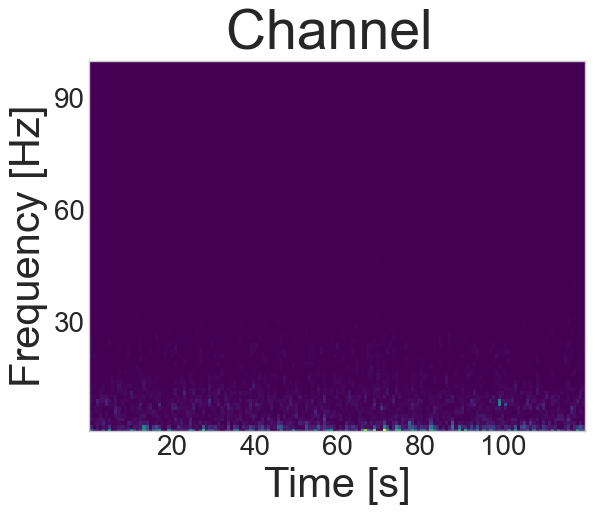

In [24]:

sfreq=250
window_length = int(sfreq) # 1 second window length
overlap = window_length // 4 # 25% overlap
window = hann(window_length, sym=False)

#frequencies, times, Zxx = signal.stft(high_pass_filtered_1Hz, fs=sfreq, nperseg=window_length, noverlap=overlap, window='hamming')
frequencies, times, Zxx = scipy.signal.spectrogram(high_pass_notch_filtered, fs=sfreq, window=window, noverlap=overlap, scaling="density", mode="psd", axis=0)
                    
# Frequencies: 0-125 Hz (1 Hz resolution), Nyquist fs/2
# times: len=161, 0, 0.75, 1.5 .... 120.75
# Zxx: 126 arrays, each len=161
# Zxx with imaginary values -> take the absolute!
# to get power -> **2


plt.title(f"Channel ", fontdict={"size": 40})
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis')

plt.xlabel("Time [s]", fontdict={"size": 30})
plt.ylabel("Frequency [Hz]", fontdict={"size": 30})
plt.yticks(np.arange(0, 512, 30), fontsize= 20)
plt.ylim(1, 100)
plt.xticks(fontsize= 20)

(array([-5.0e-12,  0.0e+00,  5.0e-12,  1.0e-11,  1.5e-11,  2.0e-11,
         2.5e-11]),
 [Text(0, -5e-12, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 5e-12, '0.5'),
  Text(0, 1.0000000000000001e-11, '1.0'),
  Text(0, 1.5e-11, '1.5'),
  Text(0, 2e-11, '2.0'),
  Text(0, 2.5e-11, '2.5')])

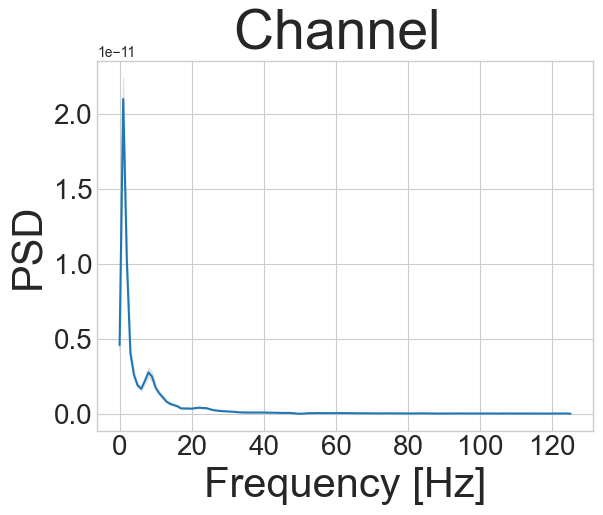

In [25]:
average_Zxx = np.mean(Zxx, axis=1)
std_Zxx = np.std(Zxx, axis=1)
sem_Zxx = std_Zxx / np.sqrt(Zxx.shape[1])
plt.title(f"Channel ", fontdict={"size": 40})
plt.plot(frequencies, average_Zxx)
plt.fill_between(frequencies, average_Zxx-sem_Zxx, average_Zxx+sem_Zxx, color='lightgray', alpha=0.5)

plt.xlabel("Frequency [Hz]", fontdict={"size": 30})
plt.ylabel("PSD", fontdict={"size": 30})
#plt.ylim(1, 100)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)

In [86]:
data_250_only_notch = preprocessed_data.loc[preprocessed_data.BIDS_id == "L003"]
data_250_only_notch = data_250_only_notch.loc[data_250_only_notch.hemisphere == "Right"]
data_250_only_notch = data_250_only_notch.loc[data_250_only_notch.contact == "1A"]
only_notch = data_250_only_notch.notch_filtered_lfp_250Hz.values[0]
data_250_unfiltered = data_250_only_notch.lfp_resampled_250Hz.values[0]

In [87]:
if np.array_equal(only_notch, data_250_unfiltered):
    print("same")

### Compare LFP sfreq 4000 Hz to 250 Hz

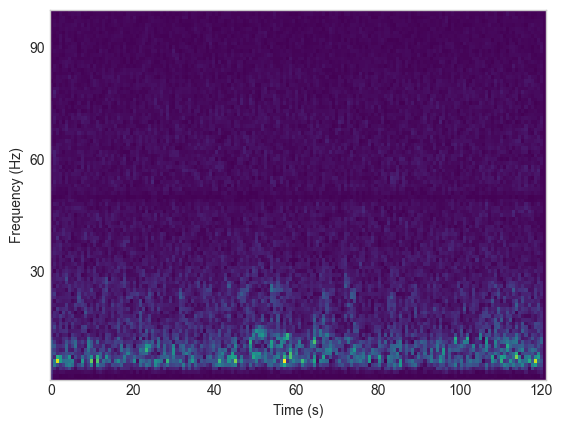

In [17]:
# sfreq 4000 Hz
fs = sfreq_4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(data_4000, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

In [34]:
Zxx.shape

(126, 161)

(0.0, 90.0)

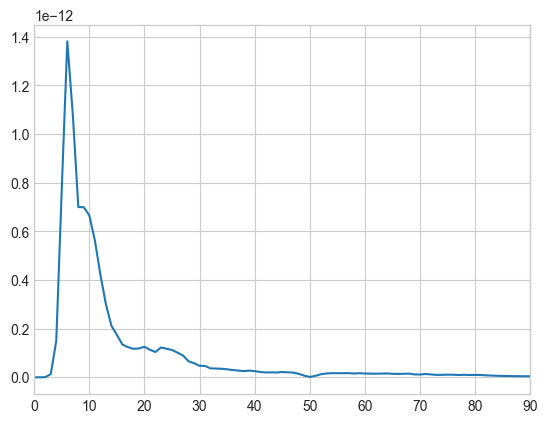

In [18]:
# average PSD across duration of the recording
average_Zxx = np.mean(np.abs(Zxx), axis=1) 

plt.plot(frequencies, average_Zxx**2) # has to be squared!
plt.xlim([0, 90])

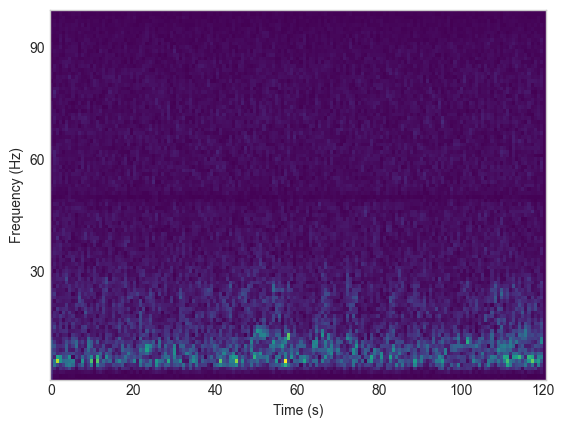

In [19]:
# sfreq 250 Hz
fs = sfreq_250
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(data_250, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

In [15]:
Zxx.shape

(126, 161)

(0.0, 90.0)

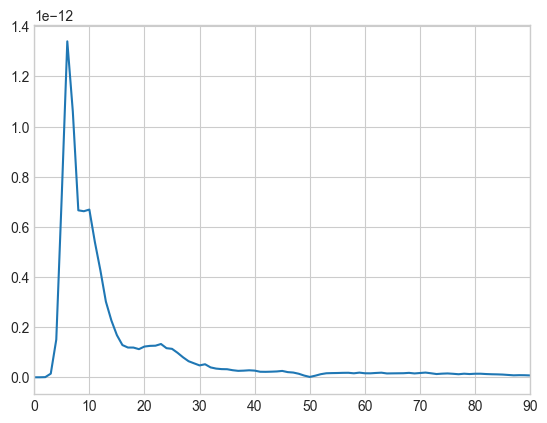

In [20]:
# average PSD across duration of the recording
average_Zxx = np.mean(np.abs(Zxx), axis=1) 

plt.plot(frequencies, average_Zxx**2) # has to be squared!
plt.xlim([0, 90])

### Plot time frequency plots of all 250 Hz resampled channels:
- Identify and clean movement artefacts


Plot all time frequency plots


In [55]:
plot_time_frequency = externalized.fourier_transform_time_frequency_plots(
    incl_bids_id=["all"], reference="bipolar_to_lowermost"
)

Clean all artefacts, plot new clean time frequency plots and save a new pickle file
- externalized_preprocessed_data_artefact_free.pickle

In [61]:
# cleans all artefacts, if there artefacts noted in the artefact Excel sheet
artefact_free_lfp = externalized.clean_artefacts(reference="bipolar_to_lowermost")

In [46]:
artefact_free_lfp = io_externalized.load_externalized_pickle(filename="externalized_preprocessed_data_artefact_free")

In [50]:
artefact_free_lfp.head()

BIDS_id subject hemisphere subject_hemisphere original_ch_name contact  \
0  noBIDS24     024      Right          024_Right  LFP_R_01_STN_MT       0   
1  noBIDS24     024      Right          024_Right  LFP_R_02_STN_MT      1A   
2  noBIDS24     024      Right          024_Right  LFP_R_03_STN_MT      1B   
3  noBIDS24     024      Right          024_Right  LFP_R_04_STN_MT      1C   
4  noBIDS24     024      Right          024_Right  LFP_R_05_STN_MT      2A   

                                           lfp_2_min  \
0  [-0.0146489130859375, -0.014644931640625, -0.0...   
1  [0.039686453125, 0.039691835937499996, 0.03968...   
2  [0.03292761328125, 0.032930234375, 0.032923703...   
3  [0.045496296874999995, 0.045501386718749995, 0...   
4  [0.0427853984375, 0.042789980468749995, 0.0427...   

                                         time_stamps   sfreq  sfreq_250Hz  \
0  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
1  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
2  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
3  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
4  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   

                                 lfp_resampled_250Hz  \
0  [-0.014650027539175887, -0.014658252839254222,...   
1  [0.03968639766579897, 0.03968883078857783, 0.0...   
2  [0.032927483537599944, 0.03292990107505366, 0....   
3  [0.04549634883916892, 0.045498958747322946, 0....   
4  [0.04278504138418886, 0.04278242301035655, 0.0...   

                                   time_stamps_250Hz  \
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
1  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
2  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
3  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
4  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   

                                 filtered_lfp_4000Hz  \
0  [3.949032564210164e-06, 3.231238646820861e-06,...   
1  [2.69323285735393e-06, 2.6718105241033025e-06,...   
2  [5.628119694315582e-06, 5.634421217695854e-06,...   
3  [2.665509928098474e-06, 2.743510995010399e-06,...   
4  [1.3620866122894671e-06, 1.0821347147950646e-0...   

                                  filtered_lfp_250Hz  \
0  [6.123400776917009e-07, -5.407946823371875e-06...   
1  [8.025196923263087e-07, 2.69209607371728e-06, ...   
2  [4.2740305276734576e-07, 2.710763405123185e-06...   
3  [4.4935559260612634e-07, 2.595175289608499e-06...   
4  [4.438050843228251e-07, -2.0337643064453155e-0...   

                           only_high_pass_lfp_4000Hz  \
0  [-2.4981869404081425e-05, -2.098775904803258e-...   
1  [5.3605057278560556e-05, 5.898965124908392e-05...   
2  [4.5840314161579463e-05, 4.8444143264025994e-0...   
3  [6.176658591199339e-05, 6.683700517625139e-05,...   
4  [5.5626169510300896e-05, 6.016454306745876e-05...   

                            only_high_pass_lfp_250Hz  n_samples_250Hz  
0  [-3.083407269474924e-05, -3.904940482474359e-0...            30000  
1  [4.4700173607974624e-05, 4.70875647783374e-05,...            30000  
2  [3.393127763495085e-05, 3.6322806623074414e-05...            30000  
3  [4.960405505227174e-05, 5.217963047545978e-05,...            30000  
4  [5.81265284287486e-05, 5.550971705296326e-05, ...            30000

from the raw signal cut out a segment with an artefact

In [35]:
sfreq_250 = preprocessed_data.sfreq_250Hz.values[1]
data_250 = preprocessed_data.filtered_lfp_250Hz.values[1]


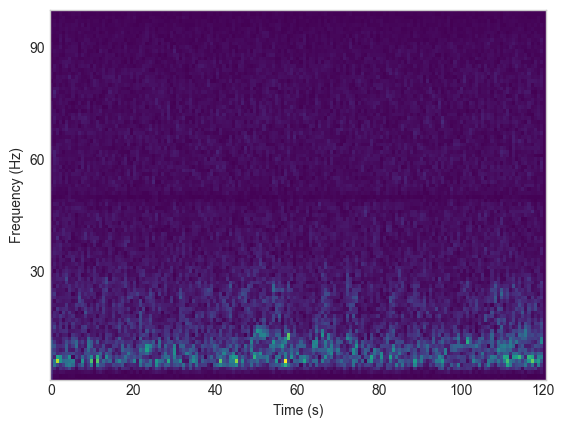

In [36]:
# sfreq 250 Hz
fs = sfreq_250
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(data_250, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

Cut out 50 - 62 s


In [49]:
# data_250.shape # 30000 samples, 250 samples/s, 120 sec
# X = 250 * input sec
# sec 50 - 62 = samples 
# 12.500 sample = 250 * 50 sec
# 15.500 sample = 250 * 62 sec

# data_250_clean_1 = data_250[0: 50sec+1]
# data_250_clean_2 = data_250[62sec:30000]

# clean_data = np.concatenate([data_250_clean_1, data_250_clean_2])
fs = sfreq_250
artefact_start = 50
artefact_stop = 62

sample_start = int(fs * artefact_start)
sample_stop = int(fs * artefact_stop)

data_clean_1 = data_250[0:sample_start+1]
data_clean_2 = data_250[sample_stop:30000]

clean_data = np.concatenate([data_clean_1, data_clean_2])

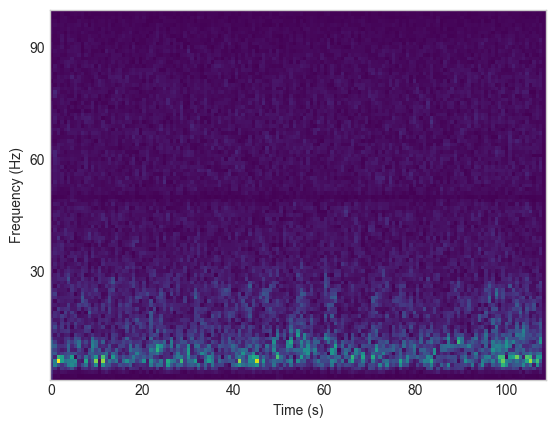

In [50]:
# sfreq 250 Hz
fs = sfreq_250
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(clean_data, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

Load the MNE objects of the cropped 2 min LFP recordings

In [114]:
mne_objects = io_externalized.load_externalized_pickle(filename="mne_objects_cropped_2_min")
mne_objects

{'25_original_2min': <RawBrainVision | sub-L001_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '30_original_2min': <RawBrainVision | sub-EL007_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '32_original_2min': <RawBrainVision | sub-L003_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '47_original_2min': <RawBrainVision | sub-L007_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '52_original_2min': <RawBrainVision | sub-EL014_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '59_original_2min': <RawBrainVision | sub-EL016_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopaPre_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '61_original_2min': <RawBrainVision | sub-L010_ses-LfpMedOffDy

Effective window size : 0.512 (s)
Need more than one channel to make topography for dbs. Disabling interactivity.


/var/folders/8d/3m_ljz890_j62q7hb7mpzdc40000gn/T/ipykernel_87578/1630132626.py:4: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  spectrum.plot(picks="LFP_R_02_STN_MT")
/var/folders/8d/3m_ljz890_j62q7hb7mpzdc40000gn/T/ipykernel_87578/1630132626.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  spectrum.plot(picks="LFP_R_02_STN_MT")
/Users/jenniferbehnke/anaconda3/envs/bssu/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


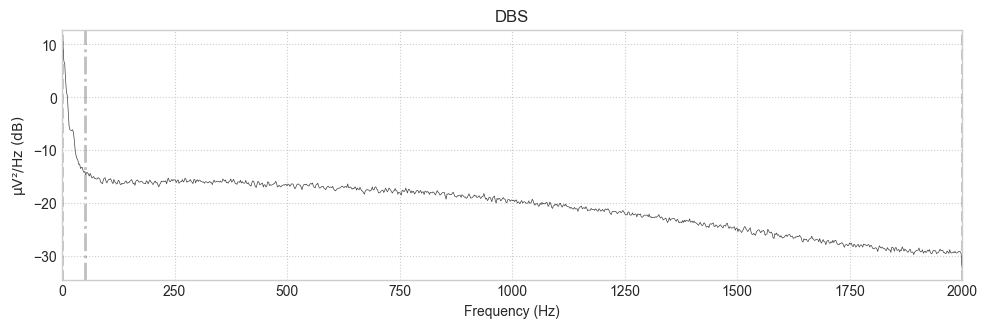

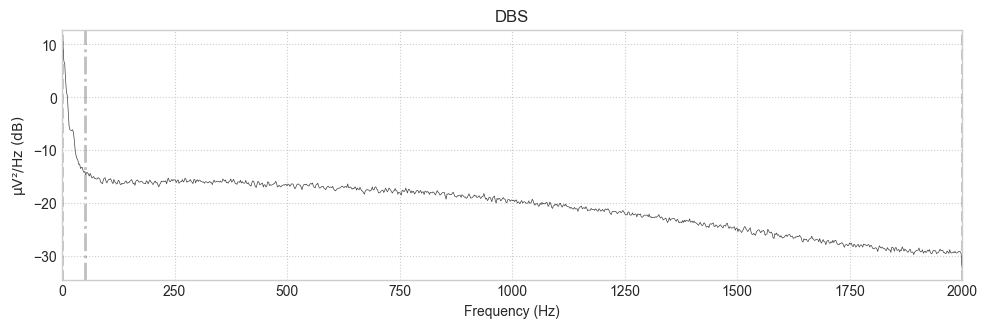

In [115]:
raw = mne_objects["25_original_2min"]
# raw.plot()
spectrum = raw.compute_psd()
spectrum.plot(picks="LFP_R_02_STN_MT")

In [ ]:
# downsample to 4000 Hz and to 250 Hz

Plot the raw signals and filter line noise

In [218]:
# get an example original cropped signal
sub025_1A = preprocessed_data.lfp_2_min.values[1]
sub025_timestamps = preprocessed_data.time_stamps.values[1]
sub025_1A

array([0.04113793, 0.0411472 , 0.04115371, ..., 0.04123406, 0.04123497,
       0.04123966])

In [219]:
fs = 4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap
notch_freq = 50 # 50 Hz line noise in Europe
Q = 30 # Q factor for notch filter

# apply notch filter
b, a = scipy.signal.iirnotch(w0=notch_freq, Q=Q, fs=fs)
filtered_signal = scipy.signal.filtfilt(b, a, sub025_1A)


In [266]:
# set filter parameters for band-pass filter
filter_order = 3 # in MATLAB spm_eeg_filter default=5 Butterworth
frequency_cutoff_low = 5 # 5Hz high-pass filter 
frequency_cutoff_high = 95 # 95 Hz low-pass filter
fs = 4000

# create the filter
b, a = scipy.signal.butter(filter_order, (frequency_cutoff_low, frequency_cutoff_high), btype='bandpass', output='ba', fs=fs)
band_pass_filtered = scipy.signal.filtfilt(b, a, filtered_signal) 

In [267]:
band_pass_filtered # ????

array([-2.19025539e-06, -1.26085267e-06, -3.37861237e-07, ...,
       -4.70026647e-06, -4.27250518e-06, -3.84178522e-06])

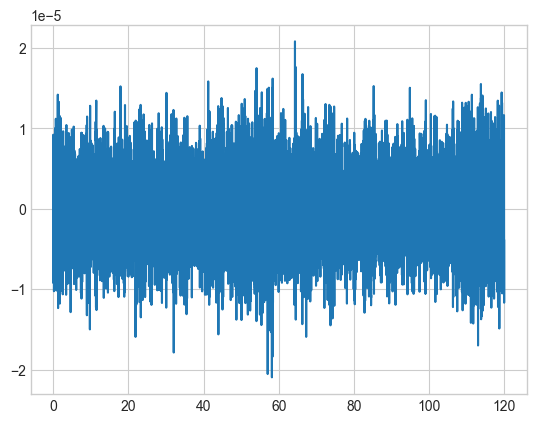

In [268]:
fig, axes = plt.subplots(1, 1)

#axes.set_ylim(0.041, 0.0414)
axes.plot(sub025_timestamps, band_pass_filtered)



plt.show()


Option 1:

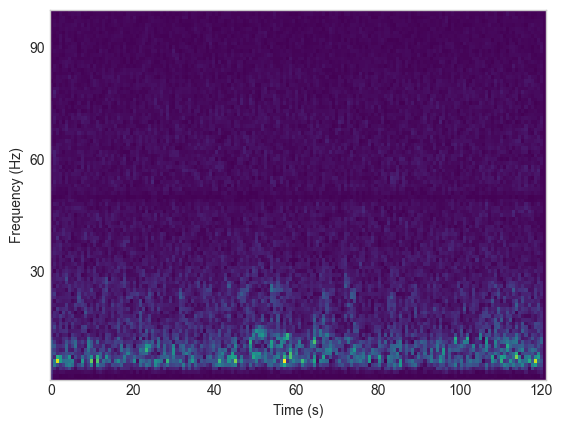

In [300]:
fs = 4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

frequencies, times, Zxx = signal.stft(band_pass_filtered, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))

axs.set_xlabel('Time (s)')

axs.set_ylabel('Frequency (Hz)')

#plt.colorbar(label='Amplitude (dB)')

axs.set_ylim(1, 100)



plt.show()

In [227]:
times.shape

(162,)

In [228]:
frequencies.shape

(2001,)

In [229]:
Zxx.shape

(2001, 162)

(0.0, 90.0)

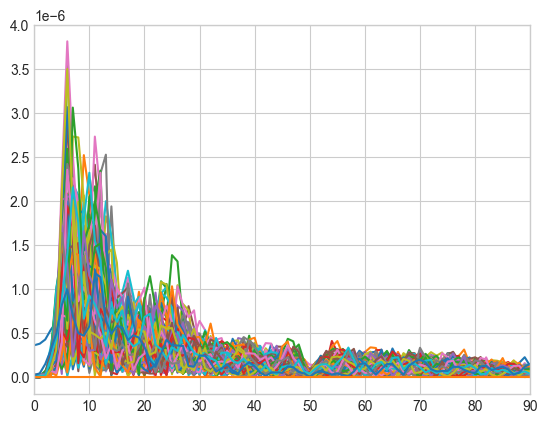

In [270]:
plt.plot(np.abs(Zxx)) # squared magnitude
plt.xlim([0, 90])

(0.0, 90.0)

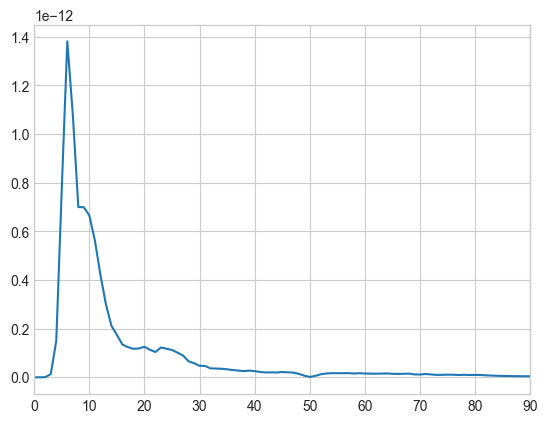

In [281]:
# average PSD across duration of the recording
average_Zxx = np.mean(np.abs(Zxx), axis=1) 

plt.plot(frequencies, average_Zxx**2) # has to be squared!
plt.xlim([0, 90])

Option 2:

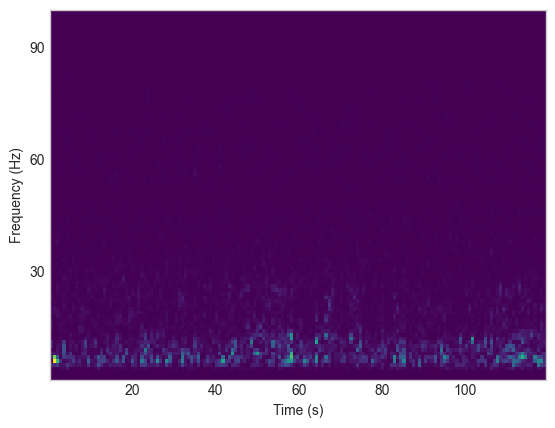

In [277]:
fs = 4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hann window
window = hann(window_length, sym=False)

# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
frequencies, times, Zxx = scipy.signal.spectrogram(band_pass_filtered, fs=fs, window=window, noverlap=overlap, scaling="density", mode="psd", axis=0)
# this function computes the PSD directly

# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)


axs.pcolormesh(times, frequencies, Zxx, shading='auto', cmap='viridis') # -1, +1, zscore over time
# axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis')


axs.set_yticks(np.arange(0, 512, 30))

axs.set_xlabel('Time (s)')

axs.set_ylabel('Frequency (Hz)')

#plt.colorbar(label='Amplitude (dB)')

axs.set_ylim(1, 100)



plt.show()

In [273]:
Zxx

array([[6.46437401e-16, 2.47326886e-16, 1.09113187e-14, ...,
        1.92294502e-16, 1.43206127e-14, 3.27999118e-14],
       [3.25200309e-16, 2.15256974e-19, 4.81071753e-15, ...,
        1.45814374e-16, 6.13961036e-15, 1.46834501e-14],
       [2.86530071e-15, 1.31610115e-15, 2.66859833e-15, ...,
        6.12193309e-16, 3.60726584e-16, 2.30462251e-15],
       ...,
       [1.59000218e-33, 9.85202316e-35, 1.07194008e-34, ...,
        3.07551176e-36, 7.40492531e-35, 2.66352586e-35],
       [1.58965926e-33, 9.83595448e-35, 1.06792233e-34, ...,
        3.07521154e-36, 7.36135361e-35, 2.65496914e-35],
       [7.94771229e-34, 4.91525705e-35, 5.33298133e-35, ...,
        1.53749507e-36, 3.67341237e-35, 1.32605094e-35]])

(0.0, 90.0)

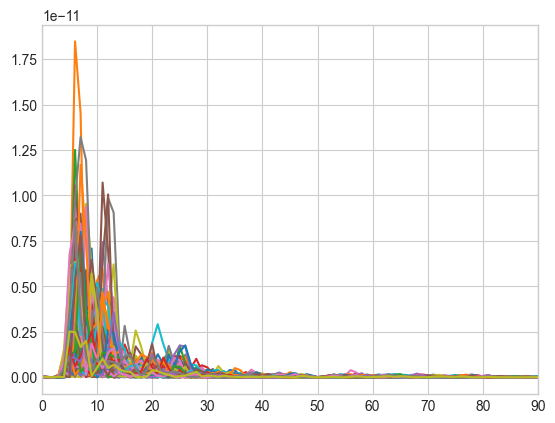

In [274]:
plt.plot(Zxx)
plt.xlim([0, 90])

(0.0, 90.0)

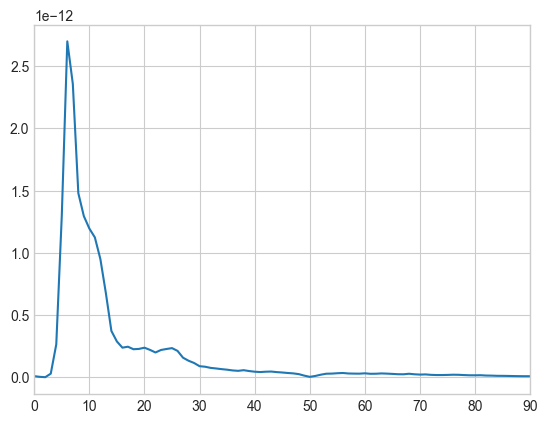

In [278]:
# average PSD across duration of the recording
average_Zxx = np.mean(Zxx, axis=1)

plt.plot(frequencies, average_Zxx)
plt.xlim([0, 90])

In [276]:
# FILTER: NOTCH and LOW, HIGH PASS
# sample frequency: 250 Hz
fs = preprocessed_data.resampled_sfreq.values[1]

# set filter parameters for band-pass filter
filter_order = 5 # in MATLAB spm_eeg_filter default=5 Butterworth
frequency_cutoff_low = 5 # 5Hz high-pass filter
frequency_cutoff_high = 95 # 95 Hz low-pass filter

# create the filter
b, a = scipy.signal.butter(filter_order, (frequency_cutoff_low, frequency_cutoff_high), btype='bandpass', output='ba', fs=fs)


AttributeError: 'DataFrame' object has no attribute 'resampled_sfreq'

In [15]:
band_pass_filtered = scipy.signal.filtfilt(b, a, sub025_1A_resampled)

(array([[9.61530952e-12, 1.88501627e-11, 1.50461859e-11, ...,
         5.43574363e-12, 2.46486404e-14, 1.62972950e-12],
        [1.07909555e-11, 1.39377777e-11, 5.53914223e-12, ...,
         1.09332718e-11, 1.58342623e-12, 2.29883960e-11],
        [2.35033062e-14, 5.46499555e-14, 1.59073379e-12, ...,
         4.29067698e-12, 2.05497331e-12, 2.29038520e-12],
        ...,
        [2.16931534e-26, 1.41231330e-27, 4.02565590e-27, ...,
         2.62602663e-27, 4.69393115e-27, 1.12384189e-26],
        [1.68908213e-26, 1.11465326e-27, 4.12497041e-27, ...,
         1.05032923e-27, 2.11868874e-27, 1.08820083e-26],
        [7.64576358e-27, 5.08755106e-28, 2.07979787e-27, ...,
         2.62878180e-28, 6.31026026e-28, 5.38235710e-27]]),
 array([  0.       ,   0.9765625,   1.953125 ,   2.9296875,   3.90625  ,
          4.8828125,   5.859375 ,   6.8359375,   7.8125   ,   8.7890625,
          9.765625 ,  10.7421875,  11.71875  ,  12.6953125,  13.671875 ,
         14.6484375,  15.625    ,  16.6015625,

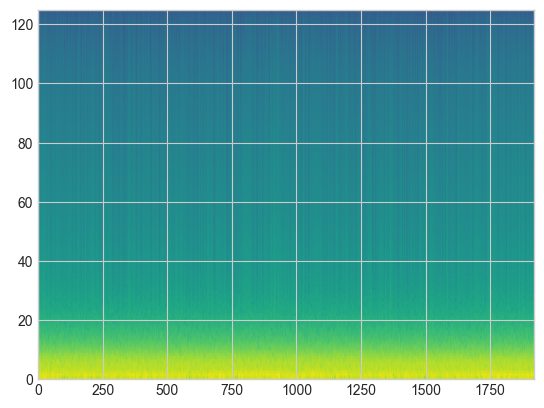

In [71]:
plt.specgram(
    x=band_pass_filtered,
    Fs=250,
    noverlap=0,
    cmap="viridis"
    )

### ECG artifact cleaning

In [3]:
power_spectra_data =io_externalized.load_externalized_pickle(filename="externalized_preprocessed_data_artefact_free", reference="bipolar_to_lowermost")
power_spectra_data.head()

reference   BIDS_id subject hemisphere subject_hemisphere  \
0  bipolar_to_lowermost  noBIDS24     024      Right          024_Right   
1  bipolar_to_lowermost  noBIDS24     024      Right          024_Right   
2  bipolar_to_lowermost  noBIDS24     024      Right          024_Right   
3  bipolar_to_lowermost  noBIDS24     024      Right          024_Right   
4  bipolar_to_lowermost  noBIDS24     024      Right          024_Right   

  original_ch_name contact                                          lfp_2_min  \
0  LFP_R_01_STN_MT       0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  LFP_R_02_STN_MT      1A  [0.0543353662109375, 0.05433676757812499, 0.05...   
2  LFP_R_03_STN_MT      1B  [0.0475765263671875, 0.047575166015624996, 0.0...   
3  LFP_R_04_STN_MT      1C  [0.060145209960937494, 0.06014631835937499, 0....   
4  LFP_R_05_STN_MT      2A  [0.057434311523437497, 0.05743491210937499, 0....   

                                         time_stamps   sfreq  sfreq_250Hz  \
0  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
1  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
2  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
3  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
4  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   

                                 lfp_resampled_250Hz  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.05433642520497486, 0.054347083627832055, 0....   
2  [0.04757751107677583, 0.04758815391430789, 0.0...   
3  [0.06014637637834481, 0.060157211586577164, 0....   
4  [0.057435068923364745, 0.05744067584961077, 0....   

                                   time_stamps_250Hz  \
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
1  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
2  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
3  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
4  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   

                                 filtered_lfp_4000Hz  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [-1.2557988136520082e-06, -5.594272302058185e-...   
2  [1.679086698728247e-06, 2.4031821423770736e-06...   
3  [-1.2835222846784321e-06, -4.877273052151927e-...   
4  [-2.586945865051337e-06, -2.149103846340745e-0...   

                                  filtered_lfp_250Hz  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [1.9017961460546365e-07, 8.100042897097374e-06...   
2  [-1.8493702489157118e-07, 8.118710228550944e-0...   
3  [-1.6298448517866118e-07, 8.003122112838922e-0...   
4  [-1.6853499337780416e-07, 3.3741825168802734e-...   

                           only_high_pass_lfp_4000Hz  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [6.583314221185715e-05, 6.721252930206158e-05,...   
2  [7.922752617685205e-05, 7.786464966491526e-05,...   
3  [5.107714843026012e-05, 5.213914379773531e-05,...   
4  [0.00011505766710054658, 0.0001156166972825195...   

                            only_high_pass_lfp_250Hz  n_samples_250Hz  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            30000  
1  [4.624115761645226e-05, 5.6810598529643836e-05...            30000  
2  [6.71617994297772e-05, 7.77736702413023e-05, 7...            30000  
3  [7.499835445385738e-05, 8.58136558990006e-05, ...            30000  
4  [8.654029045032012e-05, 9.215952648499359e-05,...            30000

In [128]:
# sub_data = power_spectra_data.loc[power_spectra_data.BIDS_id == "L003"]
# hem_data = sub_data.loc[sub_data.hemisphere == "Left"]
# figures_path=find_folders.get_monopolar_project_path(folder="figures", sub="L003")

# array_data = externalized_ecg.externalized_rec_to_2D_array(filter="only_high_pass_filtered", data=hem_data)
# plot = externalized_ecg.plot_ieeg_data(sub="024", hemisphere="Left", ieeg_data=array_data, fig_title="test", figures_path=figures_path, filtered="only_high_pass_filtered")

In [150]:
ecg_cleaning = externalized_ecg.ecg_cleaning(sub="079", filtered="only_high_pass_filtered")

### Plot Power Spectra of filtered 250 Hz artefact-free externalized LFP

In [63]:
# Transform fs=250 Hz 2 min signals to Power Spectra, save the Power values and plot all filtered Power Spectra
power_spectra = externalized.fourier_transform_to_psd(reference="bipolar_to_lowermost")

In [38]:
power_spectra_data =io_externalized.load_externalized_pickle(filename="externalized_power_spectra_250Hz_artefact_free", reference="bipolar_to_lowermost")
power_spectra_data.head()

BIDS_id subject hemisphere  \
noBIDS24_Right_0_notch_and_band_pass_filtered   noBIDS24     024      Right   
noBIDS24_Right_0_unfiltered                     noBIDS24     024      Right   
noBIDS24_Right_0_only_high_pass_filtered        noBIDS24     024      Right   
noBIDS24_Right_1A_notch_and_band_pass_filtered  noBIDS24     024      Right   
noBIDS24_Right_1A_unfiltered                    noBIDS24     024      Right   

                                               subject_hemisphere contact  \
noBIDS24_Right_0_notch_and_band_pass_filtered           024_Right       0   
noBIDS24_Right_0_unfiltered                             024_Right       0   
noBIDS24_Right_0_only_high_pass_filtered                024_Right       0   
noBIDS24_Right_1A_notch_and_band_pass_filtered          024_Right      1A   
noBIDS24_Right_1A_unfiltered                            024_Right      1A   

                                               original_ch_name  \
noBIDS24_Right_0_notch_and_band_pass_filtered   LFP_R_01_STN_MT   
noBIDS24_Right_0_unfiltered                     LFP_R_01_STN_MT   
noBIDS24_Right_0_only_high_pass_filtered        LFP_R_01_STN_MT   
noBIDS24_Right_1A_notch_and_band_pass_filtered  LFP_R_02_STN_MT   
noBIDS24_Right_1A_unfiltered                    LFP_R_02_STN_MT   

                                                                    filtered  \
noBIDS24_Right_0_notch_and_band_pass_filtered   notch_and_band_pass_filtered   
noBIDS24_Right_0_unfiltered                                       unfiltered   
noBIDS24_Right_0_only_high_pass_filtered             only_high_pass_filtered   
noBIDS24_Right_1A_notch_and_band_pass_filtered  notch_and_band_pass_filtered   
noBIDS24_Right_1A_unfiltered                                      unfiltered   

                                                                                         lfp_data  \
noBIDS24_Right_0_notch_and_band_pass_filtered   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
noBIDS24_Right_0_unfiltered                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
noBIDS24_Right_0_only_high_pass_filtered        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
noBIDS24_Right_1A_notch_and_band_pass_filtered  [1.9017961460546365e-07, 8.100042897097374e-06...   
noBIDS24_Right_1A_unfiltered                    [0.05433642520497486, 0.054347083627832055, 0....   

                                                                                      frequencies  \
noBIDS24_Right_0_notch_and_band_pass_filtered   [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_0_unfiltered                     [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_0_only_high_pass_filtered        [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_1A_notch_and_band_pass_filtered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_1A_unfiltered                    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                                                                            times  \
noBIDS24_Right_0_notch_and_band_pass_filtered   [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_0_unfiltered                     [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_0_only_high_pass_filtered        [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_1A_notch_and_band_pass_filtered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_1A_unfiltered                    [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   

                                                                                            power  \
noBIDS24_Right_0_notch_and_band_pass_filtered   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
noBIDS24_Right_0_unfiltered                     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
noBIDS24_Right_0_only_high_pass_filtered        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
no

In [92]:
power_unfiltered = power_spectra_data.loc[power_spectra_data.filtered == "unfiltered"]
power_unfiltered = power_unfiltered.loc[power_unfiltered.BIDS_id == "L001"]
power_unfiltered = power_unfiltered.loc[power_unfiltered.hemisphere == "Right"]
power_unfiltered = power_unfiltered.loc[power_unfiltered.contact == "1A"]
power_no_filter = power_unfiltered.power_average_over_time.values[0]

In [93]:
power_unfiltered

BIDS_id subject hemisphere subject_hemisphere  \
L001_Right_1A_unfiltered    L001     025      Right          025_Right   

                         contact original_ch_name    filtered  \
L001_Right_1A_unfiltered      1A  LFP_R_02_STN_MT  unfiltered   

                                                                   lfp_data  \
L001_Right_1A_unfiltered  [0.04113918003087577, 0.04115062690047614, 0.0...   

                                                                frequencies  \
L001_Right_1A_unfiltered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                                                      times  \
L001_Right_1A_unfiltered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   

                                                                      power  \
L001_Right_1A_unfiltered  [[1.3629756577203503e-12, 5.210482416985302e-1...   

                                                    power_average_over_time  \
L001_Right_1A_unfiltered  [8.060497209650237e-12, 3.942670102156593e-11,...   

                                                                  power_std  \
L001_Right_1A_unfiltered  [7.472050982021948e-12, 2.7811069843630833e-11...   

                                                                  power_sem  
L001_Right_1A_unfiltered  [6.060633645325551e-13, 2.255775636600344e-12,...

In [94]:
data_250_only_notch = power_spectra_data.loc[power_spectra_data.filtered == "notch-filtered"]
data_250_only_notch = data_250_only_notch.loc[data_250_only_notch.BIDS_id == "L001"]
data_250_only_notch = data_250_only_notch.loc[data_250_only_notch.hemisphere == "Right"]
data_250_only_notch = data_250_only_notch.loc[data_250_only_notch.contact == "1A"]
power_notch = data_250_only_notch.power_average_over_time.values[0]
power_notch

array([8.06048461e-12, 3.94266565e-11, 1.77135922e-11, 4.97046511e-12,
       4.18015807e-12, 4.29843457e-12, 4.45822509e-12, 2.90341679e-12,
       1.55106672e-12, 1.34275709e-12, 1.21581128e-12, 1.09391141e-12,
       8.79351514e-13, 6.26887739e-13, 3.98406678e-13, 2.79471824e-13,
       2.34639424e-13, 2.33011328e-13, 2.14411574e-13, 2.23996546e-13,
       2.43290543e-13, 2.22908080e-13, 2.01994021e-13, 2.18671651e-13,
       2.20742746e-13, 2.22289434e-13, 2.11651188e-13, 1.57661395e-13,
       1.31870186e-13, 1.16521966e-13, 9.67395449e-14, 8.76073692e-14,
       7.48380401e-14, 6.92779618e-14, 6.35049370e-14, 5.90387941e-14,
       5.37235348e-14, 5.28290447e-14, 5.54433435e-14, 5.07569273e-14,
       4.64054534e-14, 4.29018984e-14, 4.48105685e-14, 4.60039529e-14,
       4.14262215e-14, 4.00989867e-14, 3.37356961e-14, 3.19155767e-14,
       2.76968827e-14, 1.40157895e-14, 3.96951543e-15, 1.13281233e-14,
       2.19275193e-14, 3.05494078e-14, 3.26254803e-14, 3.47748449e-14,
      

In [74]:
data_250_only_notch

BIDS_id subject hemisphere subject_hemisphere  \
L003_Right_1A_notch-filtered    L003     032      Right          032_Right   

                             contact original_ch_name        filtered  \
L003_Right_1A_notch-filtered      1A  LFP_R_02_STN_MT  notch-filtered   

                                                                       lfp_data  \
L003_Right_1A_notch-filtered  [0.042660360455773955, 0.04265382907504139, 0....   

                                                                    frequencies  \
L003_Right_1A_notch-filtered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                                                          times  \
L003_Right_1A_notch-filtered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   

                                                                          power  \
L003_Right_1A_notch-filtered  [[9.328421362260062e-12, 1.1690166248022742e-1...   

                                                        power_average_over_time  \
L003_Right_1A_notch-filtered  [2.7110675063959572e-11, 1.3424873494131753e-1...   

                                                                      power_std  \
L003_Right_1A_notch-filtered  [5.1115597116059836e-11, 2.307697042443287e-10...   

                                                                      power_sem  
L003_Right_1A_notch-filtered  [4.0537305347821045e-12, 1.83012279886672e-11,...

## FOOOF: Input = unfiltered, sfreq 250 Hz, artefact-free, Power Spectra

### fit the FOOOF model

In [65]:
# Run FOOOF for all externalized recordings
fooof_spectra = externalized.externalized_fooof_fit(fooof_version="v2", filtered="only_high_pass_filtered", reference="bipolar_to_lowermost")

In [66]:
group_fooof_pickle = load_data.load_externalized_pickle(filename="fooof_externalized_group_only_high_pass_filtered", fooof_version="v2", reference="bipolar_to_lowermost")

In [76]:
copy = group_fooof_pickle.copy()
copy["beta_cluster"] = copy["fooof_error"].apply(externalized_helpers.assign_cluster)

In [90]:
single = group_fooof_pickle.loc[group_fooof_pickle.BIDS_id == "noBIDS24"]
single = single.loc[single.hemisphere == "Left"]
single = single.loc[single.contact == "1A"]
power = single.fooof_power_spectrum.values[0]

In [91]:
single

filtered   BIDS_id subject hemisphere subject_hemisphere contact  \
9  notch-filtered  noBIDS24     024       Left           024_Left      1A   

  original_ch_name  fooof_error  fooof_r_sq  fooof_exponent  fooof_offset  \
9  LFP_L_02_STN_MT     0.090126     0.95562        1.479378    -10.876297   

                                fooof_power_spectrum  \
9  [2.3627557539284955e-16, 5.927551694212868e-16...   

                   periodic_plus_aperiodic_power_log  \
9  [-10.876289254254633, -11.321580153453521, -11...   

                                 fooof_periodic_flat  fooof_number_peaks  \
9  [7.717848583410502e-06, 5.3984217010608787e-05...                   2   

  alpha_peak_CF_power_bandWidth low_beta_peak_CF_power_bandWidth  \
9               [nan, nan, nan]                  [nan, nan, nan]   

                   high_beta_peak_CF_power_bandWidth  \
9  [23.66048440571945, 0.9443955798239951, 8.1809...   

                        beta_peak_CF_power_bandWidth  \
9  [23.66048440571945, 0.9443955798239951, 8.1809...   

  gamma_peak_CF_power_bandWidth  
9               [nan, nan, nan]

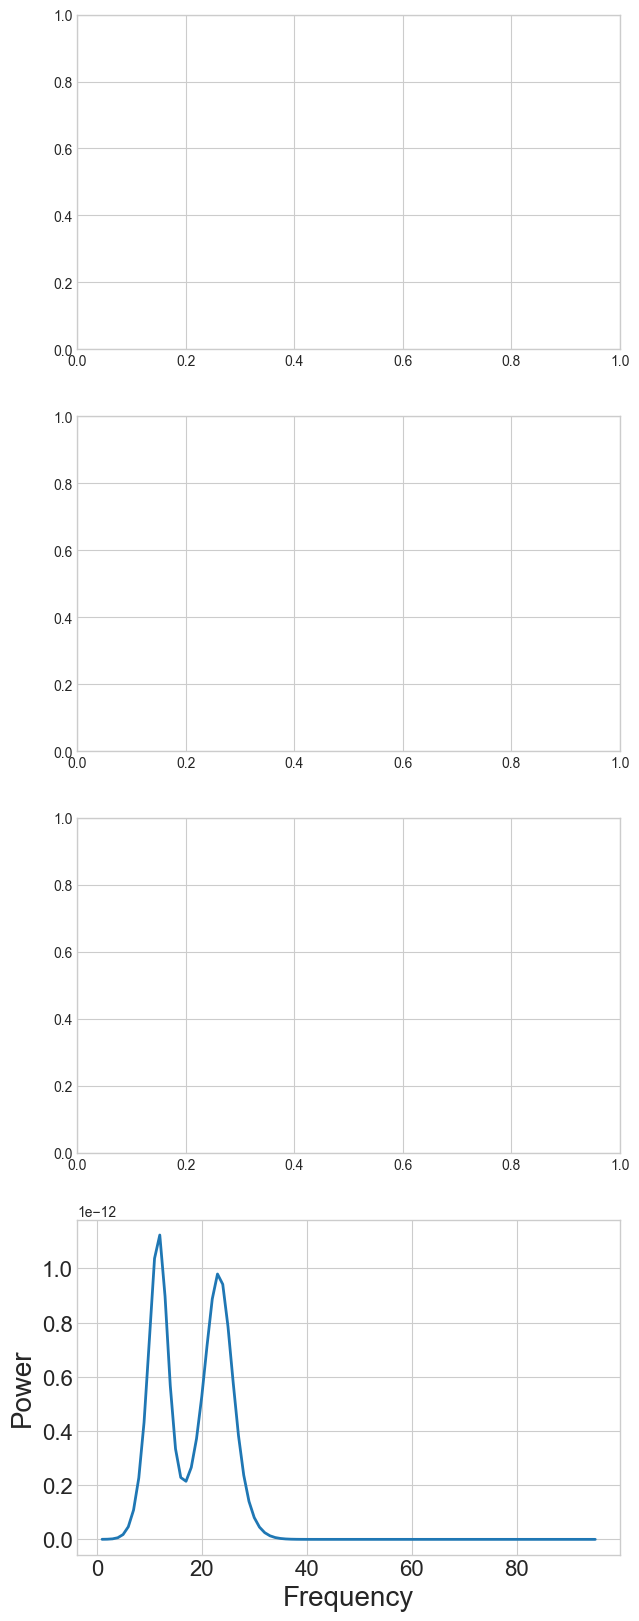

In [92]:
fig, ax = plt.subplots(4,1, figsize=(7,20))
plot_spectrum(np.arange(1, (len(power)+1)), power, log_freqs=False, log_powers=False, ax=ax[3])
                

In [2]:
common_reference = load_data.load_externalized_pickle(filename="externalized_contacts_common_reference")

In [3]:
common_reference

BIDS_id subject hemisphere contact original_ch_name
024_Left_3    noBIDS24     024       Left       3  LFP_L_08_STN_MT
025_Left_0        L001     025       Left       0  LFP_L_01_STN_MT
028_Left_3    noBIDS28     028       Left       3  LFP_L_08_STN_MT
029_Right_3   noBIDS29     029      Right       3  LFP_R_08_STN_MT
030_Left_0       EL007     030       Left       0  LFP_L_01_STN_MT
032_Left_3        L003     032       Left       3  LFP_L_08_STN_MT
047_Left_0        L007     047       Left       0  LFP_L_01_STN_MT
048_Right_0   noBIDS48     048      Right       0  LFP_R_01_STN_MT
048_Right_2C  noBIDS48     048      Right      2C  LFP_R_07_STN_MT
048_Left_0    noBIDS48     048       Left       0  LFP_L_01_STN_MT
049_Left_0    noBIDS49     049       Left       0  LFP_L_01_STN_MT
052_Right_2C     EL014     052      Right      2C  LFP_R_07_STN_MT
052_Left_0       EL014     052       Left       0  LFP_L_01_STN_MT
056_Left_0    noBIDS56     056       Left       0  LFP_L_01_STN_MT
059_Left_0       EL016     059       Left       0  LFP_L_01_STN_MT
061_Left_0        L010     061       Left       0  LFP_L_01_STN_MT
064_Right_0       L012     064      Right       0  LFP_R_01_STN_MT
067_Left_0       EL017     067       Left       0  LFP_L_01_STN_MT
069_Left_0        L013     069       Left       0  LFP_L_01_STN_MT
071_Left_0        L014     071       Left       0  LFP_L_01_STN_MT
072_Right_0       L015     072      Right       0  LFP_R_01_STN_MT
075_Left_0       EL019     075       Left       0  LFP_L_01_STN_MT
077_Left_0        L016     077       Left       0  LFP_L_01_STN_MT
079_Left_0        L017     079       Left       0  LFP_L_01_STN_MT
080_Left_0       EL021     080       Left       0  LFP_L_01_STN_MT

In [5]:
common_reference.BIDS_id.count()

25

In [27]:
power_spectra_data =load_data.load_externalized_pickle(filename="externalized_power_spectra_250Hz_artefact_free")
power_spectra_data.head()

BIDS_id subject hemisphere subject_hemisphere  \
L001_Right_0_filtered       L001     025      Right          025_Right   
L001_Right_0_unfiltered     L001     025      Right          025_Right   
L001_Right_1A_filtered      L001     025      Right          025_Right   
L001_Right_1A_unfiltered    L001     025      Right          025_Right   
L001_Right_1B_filtered      L001     025      Right          025_Right   

                         contact original_ch_name    filtered  \
L001_Right_0_filtered          0  LFP_R_01_STN_MT    filtered   
L001_Right_0_unfiltered        0  LFP_R_01_STN_MT  unfiltered   
L001_Right_1A_filtered        1A  LFP_R_02_STN_MT    filtered   
L001_Right_1A_unfiltered      1A  LFP_R_02_STN_MT  unfiltered   
L001_Right_1B_filtered        1B  LFP_R_03_STN_MT    filtered   

                                                                   lfp_data  \
L001_Right_0_filtered     [-7.59355112107618e-07, 9.768670360289528e-06,...   
L001_Right_0_unfiltered   [0.004981967630519316, 0.004993935731201689, 0...   
L001_Right_1A_filtered    [-5.4162502175678e-07, 8.516945973380159e-06, ...   
L001_Right_1A_unfiltered  [0.04113918003087577, 0.04115062690047614, 0.0...   
L001_Right_1B_filtered    [-7.327385311077718e-07, 8.641706900393375e-06...   

                                                                frequencies  \
L001_Right_0_filtered     [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
L001_Right_0_unfiltered   [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
L001_Right_1A_filtered    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
L001_Right_1A_unfiltered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
L001_Right_1B_filtered    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                                                      times  \
L001_Right_0_filtered     [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
L001_Right_0_unfiltered   [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
L001_Right_1A_filtered    [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
L001_Right_1A_unfiltered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
L001_Right_1B_filtered    [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   

                                                                      power  \
L001_Right_0_filtered     [[6.240154022593714e-17, 2.939756039377465e-15...   
L001_Right_0_unfiltered   [[1.0577415654361825e-11, 5.177284051871148e-1...   
L001_Right_1A_filtered    [[5.4698190638125844e-17, 2.789957802883439e-1...   
L001_Right_1A_unfiltered  [[1.3629756577203503e-12, 5.210482416985302e-1...   
L001_Right_1B_filtered    [[2.761192529825985e-16, 1.598304851275642e-15...   

                                                    power_average_over_time  \
L001_Right_0_filtered     [9.475302063374772e-15, 3.992891451859159e-15,...   
L001_Right_0_unfiltered   [2.595180305392358e-12, 1.3324945990664859e-11...   
L001_Right_1A_filtered    [1.1430962989460658e-14, 4.842443656275809e-15...   
L001_Right_1A_unfiltered  [8.060497209650237e-12, 3.942670102156593e-11,...   
L001_Right_1B_filtered    [8.770372233153225e-15, 3.716546219910624e-15,...   

                                                                  power_std  \
L001_Right_0_filtered     [1.286243314542217e-14, 5.3360638726692855e-15...   
L001_Right_0_unfiltered   [6.282415524911424e-12, 1.5637176278312496e-11...   
L001_Right_1A_filtered    [1.6203212692813798e-14, 6.850112232353752e-15...   
L001_Right_1A_unfiltered  [7.472050982021948e-12, 2.7811069843630833e-11...   
L001_Right_1B_filtered    [1.2357467561237215e-14, 5.211038406458603e-15...   

                                                                  power_sem  
L001_Right_0_filtered     [1.0432810920249042e-15, 4.3281193233446594e-1...  
L001_Right_0_unfiltered   [5.095711872925484e-13, 1.2683424791700508e-12...  
L001_Right_1A_filtered    [1.314254094956132e-15, 5.556174706188229e-16,...  
L001_Right_1A_unfiltered  [

In [50]:
data_to_FOOOF = power_spectra_data.loc[power_spectra_data.filtered == "unfiltered"]
data_to_FOOOF = data_to_FOOOF.loc[data_to_FOOOF.BIDS_id == "L003"]
data_to_FOOOF = data_to_FOOOF.loc[data_to_FOOOF.hemisphere == "Right"]
data_to_FOOOF = data_to_FOOOF.loc[data_to_FOOOF.contact == "1A"]
power_spectrum = data_to_FOOOF.power_average_over_time.values[0]
freqs = data_to_FOOOF.frequencies.values[0]

In [43]:
data_to_FOOOF


BIDS_id subject hemisphere subject_hemisphere  \
L001_Right_2B_unfiltered    L001     025      Right          025_Right   

                         contact original_ch_name    filtered  \
L001_Right_2B_unfiltered      2B  LFP_R_06_STN_MT  unfiltered   

                                                                   lfp_data  \
L001_Right_2B_unfiltered  [0.0545578677518972, 0.054570446793723554, 0.0...   

                                                                frequencies  \
L001_Right_2B_unfiltered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                                                      times  \
L001_Right_2B_unfiltered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   

                                                                      power  \
L001_Right_2B_unfiltered  [[3.553381807914313e-12, 3.465655154407796e-13...   

                                                    power_average_over_time  \
L001_Right_2B_unfiltered  [1.1427207759675277e-12, 8.015876630440298e-12...   

                                                                  power_std  \
L001_Right_2B_unfiltered  [2.7763941607578664e-12, 8.858333624602794e-12...   

                                                                  power_sem  
L001_Right_2B_unfiltered  [2.2519530318864596e-13, 7.18505734716742e-13,...

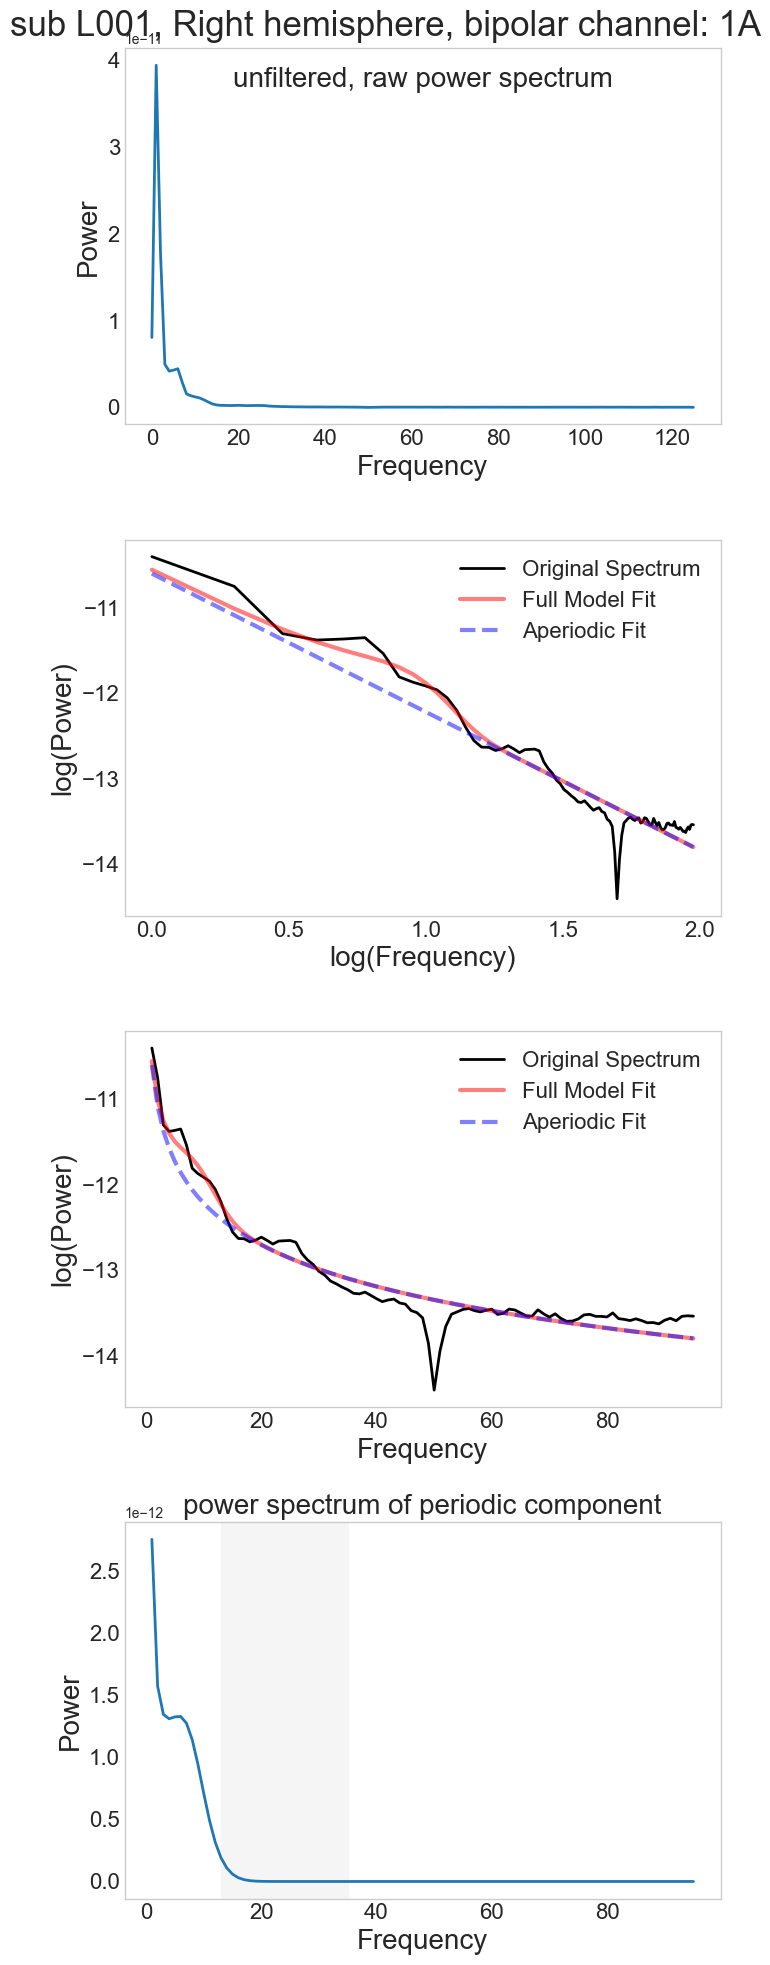

In [96]:
############ SET PLOT LAYOUT ############
fig, ax = plt.subplots(4,1, figsize=(7,20))

# Plot the unfiltered Power spectrum in first ax
plot_spectrum(freqs, power_spectrum, log_freqs=False, log_powers=False,
                ax=ax[0])
ax[0].grid(False)

############ SET FOOOF MODEL ############
freq_range = [1, 95] # frequency range to fit FOOOF model
fooof_results = {}

model = fooof.FOOOF(
        peak_width_limits=[2, 15.0],
        max_n_peaks=6,
        min_peak_height=0.2,
        peak_threshold=2.0,
        aperiodic_mode="fixed", # fitting without knee component
        verbose=True,
    )

# always fit a large Frequency band, later you can select Peaks within specific freq bands
model.fit(freqs=freqs, power_spectrum=power_spectrum, freq_range=freq_range)

# Plot an example power spectrum, with a model fit in second ax
# model.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'}, ax=ax[1])
model.plot(ax=ax[1], plt_log=True) # to evaluate the aperiodic component
model.plot(ax=ax[2], plt_log=False) # To see the periodic component better without log in frequency axis
ax[1].grid(False)
ax[2].grid(False)

# check if fooof attributes are None:
if model._peak_fit is None:
    #print(f"subject {subject}, session {ses}, {chan}: model peak fit is None.")
    print("model peak fit is None")
    # continue

if model._ap_fit is None:
    #print(f"subject {subject}, session {ses}, {chan}: model aperiodic fit is None.")
    print("model aperiodic fit is None")
    #continue


# plot only the fooof spectrum of the periodic component
fooof_power_spectrum = 10**(model._peak_fit + model._ap_fit) - (10**model._ap_fit)
plot_spectrum(np.arange(1, (len(fooof_power_spectrum)+1)), fooof_power_spectrum, log_freqs=False, log_powers=False, ax=ax[3])
# frequencies: 1-95 Hz with 1 Hz resolution

# titles
fig.suptitle(f"sub L001, Right hemisphere, bipolar channel: 1A",
                        fontsize=25)

ax[0].set_title("unfiltered, raw power spectrum", fontsize=20, y=0.97, pad=-20)
ax[3].set_title("power spectrum of periodic component", fontsize=20)

# mark beta band
x1 = 13
x2 = 35
ax[3].axvspan(x1, x2, color="whitesmoke")
ax[3].grid(False)

fig.tight_layout()
#fig.savefig(os.path.join(local_figures_path, f"fooof_model_sub{subject}_{hemisphere}_{ses}_{chan}.svg"), bbox_inches="tight", format="svg")
#fig.savefig(os.path.join(local_figures_path, f"fooof_model_sub{subject}_{hemisphere}_{ses}_{chan}.png"), bbox_inches="tight")


# extract parameters from the chosen model
# model.print_results()

############ SAVE APERIODIC PARAMETERS ############
# goodness of fit
err = model.get_params('error')
r_sq = model.r_squared_

# aperiodic components
exp = model.get_params('aperiodic_params', 'exponent')
offset = model.get_params('aperiodic_params', 'offset')

# periodic component
log_power_fooof_periodic_plus_aperiodic = model._peak_fit + model._ap_fit # periodic+aperiodic component in log Power axis
fooof_periodic_component = model._peak_fit # just periodic component, flattened spectrum

############ SAVE ALL PEAKS IN ALPHA; HIGH AND LOW BETA ############

number_peaks = model.n_peaks_

# get the highest Peak of each frequency band as an array: CF center frequency, Power, BandWidth
alpha_peak = fooof.analysis.get_band_peak_fm(
    model,
    band=(8.0, 12.0),
    select_highest=True,
    attribute="peak_params"
    )

low_beta_peak = fooof.analysis.get_band_peak_fm(
    model,
    band=(13.0, 20.0),
    select_highest=True,
    attribute="peak_params",
    )

high_beta_peak = fooof.analysis.get_band_peak_fm(
    model,
    band=(21.0, 35.0),
    select_highest=True,
    attribute="peak_params",
    )

beta_peak = fooof.analysis.get_band_peak_fm(
    model,
    band=(13.0, 35.0),
    select_highest=True,
    attribute="peak_params",
    )

gamma_peak = fooof.analysis.get_band_peak_fm(
    model,
    band=(60.0, 90.0),
    select_highest=True,
    attribute="peak_params",
    )

# save all results in dictionary
#STN = "_".join([subject, hemisphere])

fooof_results[f"L001_Right_1A"] = ["L001_Right", "1A", 
                                    err, r_sq, exp, offset, 
                                    fooof_power_spectrum, log_power_fooof_periodic_plus_aperiodic, fooof_periodic_component,
                                    number_peaks, alpha_peak, low_beta_peak, high_beta_peak, beta_peak, gamma_peak]

### Calculate periodic beta average and beta ranks 

In [81]:
beta_ranks = externalized.calculate_periodic_beta_power(filtered = "only_high_pass_filtered", fooof_version="v2", new_reference="no", reference="bipolar_to_lowermost")

fooof_externalized_beta_ranks_all_contacts_only_high_pass_filtered_bipolar_to_lowermost_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results
fooof_externalized_beta_ranks_directional_contacts_only_high_pass_filtered_bipolar_to_lowermost_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results


In [82]:
beta_ranks_directional_contacts = load_data.load_externalized_pickle(filename = "fooof_externalized_beta_ranks_directional_contacts_only_high_pass_filtered", fooof_version="v2", reference="bipolar_to_lowermost")

In [87]:
beta_ranks_directional_contacts.subject_hemisphere.unique()

array(['024_Right', '024_Left', '025_Right', '025_Left', '028_Right',
       '028_Left', '029_Right', '029_Left', '030_Right', '030_Left',
       '032_Right', '032_Left', '047_Right', '047_Left', '048_Right',
       '048_Left', '049_Right', '049_Left', '052_Right', '052_Left',
       '056_Right', '056_Left', '059_Right', '059_Left', '061_Right',
       '061_Left', '064_Right', '064_Left', '067_Right', '067_Left',
       '069_Right', '069_Left', '071_Right', '071_Left', '072_Right',
       '072_Left', '075_Right', '075_Left', '077_Right', '077_Left',
       '079_Right', '079_Left', '080_Right', '080_Left'], dtype=object)

In [137]:
beta_ranks_directional_contacts.loc[beta_ranks_directional_contacts.subject_hemisphere == "075_Right"]

reference                 filtered BIDS_id subject hemisphere  \
251  bipolar_to_lowermost  only_high_pass_filtered   EL019     075      Right   
252  bipolar_to_lowermost  only_high_pass_filtered   EL019     075      Right   
253  bipolar_to_lowermost  only_high_pass_filtered   EL019     075      Right   
254  bipolar_to_lowermost  only_high_pass_filtered   EL019     075      Right   
255  bipolar_to_lowermost  only_high_pass_filtered   EL019     075      Right   
256  bipolar_to_lowermost  only_high_pass_filtered   EL019     075      Right   

    subject_hemisphere contact original_ch_name  fooof_error  fooof_r_sq  ...  \
251          075_Right      1A  LFP_R_02_STN_MT     0.098104    0.897501  ...   
252          075_Right      1B  LFP_R_03_STN_MT     0.103784    0.891736  ...   
253          075_Right      1C  LFP_R_04_STN_MT     0.086763    0.919211  ...   
254          075_Right      2A  LFP_R_05_STN_MT     0.065608    0.969640  ...   
255          075_Right      2B  LFP_R_06_STN_MT     0.066877    0.966120  ...   
256          075_Right      2C  LFP_R_07_STN_MT     0.059966    0.973166  ...   

     fooof_number_peaks  alpha_peak_CF_power_bandWidth  \
251                   1                [nan, nan, nan]   
252                   0                [nan, nan, nan]   
253                   0                [nan, nan, nan]   
254                   1                [nan, nan, nan]   
255                   1                [nan, nan, nan]   
256                   1                [nan, nan, nan]   

    low_beta_peak_CF_power_bandWidth high_beta_peak_CF_power_bandWidth  \
251                  [nan, nan, nan]                   [nan, nan, nan]   
252                  [nan, nan, nan]                   [nan, nan, nan]   
253                  [nan, nan, nan]                   [nan, nan, nan]   
254                  [nan, nan, nan]                   [nan, nan, nan]   
255                  [nan, nan, nan]                   [nan, nan, nan]   
256                  [nan, nan, nan]                   [nan, nan, nan]   

    beta_peak_CF_power_bandWidth  gamma_peak_CF_power_bandWidth  beta_average  \
251              [nan, nan, nan]                [nan, nan, nan]  4.414490e-15   
252              [nan, nan, nan]                [nan, nan, nan]  0.000000e+00   
253              [nan, nan, nan]                [nan, nan, nan]  0.000000e+00   
254              [nan, nan, nan]                [nan, nan, nan]  4.414033e-15   
255              [nan, nan, nan]                [nan, nan, nan]  1.027608e-17   
256              [nan, nan, nan]                [nan, nan, nan]  1.420557e-17   

    beta_rank beta_relative_to_max beta_cluster  
251       1.0             1.000000            1  
252       5.5             0.000000            3  
253       5.5             0.000000            3  
254       2.0             0.999897            1  
255       4.0             0.002328            3  
256       3.0             0.003218            3  

[6 rows x 25 columns]

## SSD

In [134]:
SSD_plots = externalized.directional_SSD_externalized(reference="bipolar_to_lowermost")

Sub-048, Right hemisphere, only has 5 Eigenvalues.
SSD_directional_externalized_channels_bipolar_to_lowermost.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results


In [135]:
SSD_result = load_data.load_externalized_pickle(filename="SSD_directional_externalized_channels", reference="bipolar_to_lowermost")

In [136]:
SSD_result.head()

BIDS_id subject hemisphere subject_hemisphere contact  \
0  noBIDS24     024      Right          024_Right      1A   
1  noBIDS24     024      Right          024_Right      1B   
2  noBIDS24     024      Right          024_Right      1C   
3  noBIDS24     024      Right          024_Right      2A   
4  noBIDS24     024      Right          024_Right      2B   

                             ssd_filtered_timedomain  ssd_pattern  \
0  [0.013394533763825354, 1.6904686118689378, 2.7...     1.000000   
1  [0.013394533763825354, 1.6904686118689378, 2.7...     0.531886   
2  [0.013394533763825354, 1.6904686118689378, 2.7...     0.830341   
3  [0.013394533763825354, 1.6904686118689378, 2.7...     0.698204   
4  [0.013394533763825354, 1.6904686118689378, 2.7...     0.651009   

   ssd_eigvals  beta_rank  beta_relative_to_max  beta_cluster  
0     0.868758        1.0              1.000000             1  
1     0.816916        6.0              0.531886             2  
2     0.775643        2.0              0.830341             1  
3     0.764610        4.0              0.698204             2  
4     0.685842        5.0              0.651009             2

## Externalized re-reference level 1 to 0 and level 2 to 3

In [16]:
re_referenced_data = externalized.re_reference_externalized(incl_bids_id=["all"],
                                                         reference="bipolar_to_lowermost",
                                                         new_reference="one_to_zero_two_to_three")

externalized_directional_one_to_zero_two_to_three_channels_bipolar_to_lowermost.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results


In [17]:
re_referenced_data.head()

BIDS_id subject hemisphere  session subject_hemisphere bipolar_channel  \
0  noBIDS24     024      Right  pre-IPG          024_Right               0   
0  noBIDS24     024      Right  pre-IPG          024_Right              1A   
0  noBIDS24     024      Right  pre-IPG          024_Right              1B   
0  noBIDS24     024      Right  pre-IPG          024_Right              1C   
0  noBIDS24     024      Right  pre-IPG          024_Right              2A   

                                   time_stamps_250Hz  \
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   

                                 lfp_resampled_250Hz  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0  [0.05433642520497486, 0.054347083627832055, 0....   
0  [0.04757751107677583, 0.04758815391430789, 0.0...   
0  [0.06014637637834481, 0.060157211586577164, 0....   
0  [0.04717502951489232, 0.047171035444445245, 0....   

                                  filtered_lfp_250Hz  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
0  [1.9017961460546365e-07, 8.100042897097374e-06...   
0  [-1.8493702489157118e-07, 8.118710228550944e-0...   
0  [-1.6298448517866118e-07, 8.003122112838922e-0...   
0  [1.690063802198304e-07, -4.06620284232377e-06,...   

                            only_high_pass_lfp_250Hz  n_samples_250Hz  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            30000  
0  [-3.0816080491211818e-06, 7.176238053372991e-0...            30000  
0  [-1.6720367732338418e-06, 8.719938108947836e-0...            30000  
0  [-2.7758076256840483e-06, 7.675742055438367e-0...            30000  
0  [-1.3196782967015253e-06, -5.353569439445141e-...            30000

### Plot Power Spectra

In [19]:
power_spectra = externalized.fourier_transform_to_psd_re_ref_externalized(incl_BIDS=["all"], monopolar_or_bipolar="bipolar", new_reference="one_to_zero_two_to_three", reference="bipolar_to_lowermost")

### FOOOF

In [22]:
power_spectra = load_data.load_externalized_pickle(
            filename=f"fourier_transform_externalized_one_to_zero_two_to_three_power_spectra_250Hz_artefact_free",
            reference="bipolar_to_lowermost",
        )

In [33]:
fooof_BSSU = externalized.externalized_fooof_fit_2(
    fooof_version="v2", 
    filtered="only_high_pass_filtered", 
    reference="bipolar_to_lowermost",
    monopolar_or_bipolar="bipolar",
    new_reference="one_to_zero_two_to_three"
)

### calculate beta average and get ranks of the new re-referenced ground Truth

In [35]:
beta_ranks = externalized.calculate_periodic_beta_power(filtered = "only_high_pass_filtered", fooof_version="v2", new_reference="one_to_zero_two_to_three", reference="bipolar_to_lowermost")

fooof_externalized_beta_ranks_all_contacts_one_to_zero_two_to_three_only_high_pass_filtered_bipolar_to_lowermost_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results
fooof_externalized_beta_ranks_directional_contacts_one_to_zero_two_to_three_only_high_pass_filtered_bipolar_to_lowermost_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results


In [38]:
beta_ranks["beta_rank_directional_contacts"].head()

reference                 filtered   BIDS_id subject hemisphere  \
0  bipolar_to_lowermost  only_high_pass_filtered  noBIDS24     024      Right   
1  bipolar_to_lowermost  only_high_pass_filtered  noBIDS24     024      Right   
2  bipolar_to_lowermost  only_high_pass_filtered  noBIDS24     024      Right   
3  bipolar_to_lowermost  only_high_pass_filtered  noBIDS24     024      Right   
4  bipolar_to_lowermost  only_high_pass_filtered  noBIDS24     024      Right   

  subject_hemisphere contact  fooof_error  fooof_r_sq  fooof_exponent  ...  \
0          024_Right      1A     0.039966    0.986114        0.856089  ...   
1          024_Right      1B     0.040741    0.986198        0.916091  ...   
2          024_Right      1C     0.046919    0.984861        0.845381  ...   
3          024_Right      2A     0.070392    0.963260        1.168976  ...   
4          024_Right      2B     0.043034    0.976437        0.992294  ...   

   fooof_number_peaks                      alpha_peak_CF_power_bandWidth  \
0                   3  [10.601683566146008, 0.8582242466761958, 3.000...   
1                   3  [10.452853561939877, 0.8460518343911438, 3.000...   
2                   3  [10.52811949511266, 0.9348837908071275, 3.0000...   
3                   1  [11.015036116740083, 0.5759623398483722, 3.000...   
4                   1  [10.21109502868202, 0.24996329904494807, 3.000...   

                    low_beta_peak_CF_power_bandWidth  \
0  [14.919975005070759, 0.554247364846308, 5.0048...   
1  [15.626551585668794, 0.5350194338622067, 6.030...   
2  [15.047809101032946, 0.579624024858516, 5.6732...   
3                                    [nan, nan, nan]   
4                                    [nan, nan, nan]   

                   high_beta_peak_CF_power_bandWidth  \
0  [23.888667709802494, 0.8981909577785601, 7.591...   
1  [24.368097410028906, 0.8451498635940364, 6.716...   
2  [24.254256549629684, 0.9264413943786032, 7.581...   
3                                    [nan, nan, nan]   
4                                    [nan, nan, nan]   

                        beta_peak_CF_power_bandWidth  \
0  [23.888667709802494, 0.8981909577785601, 7.591...   
1  [24.368097410028906, 0.8451498635940364, 6.716...   
2  [24.254256549629684, 0.9264413943786032, 7.581...   
3                                    [nan, nan, nan]   
4                                    [nan, nan, nan]   

  gamma_peak_CF_power_bandWidth  beta_average beta_rank beta_relative_to_max  \
0               [nan, nan, nan]  4.864528e-13       1.0             1.000000   
1               [nan, nan, nan]  2.430705e-13       3.0             0.499679   
2               [nan, nan, nan]  4.240930e-13       2.0             0.871807   
3               [nan, nan, nan]  1.307197e-16       4.0             0.000269   
4               [nan, nan, nan]  5.841606e-18       6.0             0.000012   

  beta_cluster  
0            1  
1            2  
2            1  
3            3  
4            3  

[5 rows x 24 columns]

### SSD

## Simulate BSSU recording montage
- Ring: 01, 02, 03, 12, 13, 23
- SegmInter: 1A2A, 1B2B, 1C2C
- SegmIntra: 1A1B, 1A1C, 1B1C, 2A2B, 2A2C, 2B2C

In [5]:
artefact_free_lfp = io_externalized.load_externalized_pickle(
        filename="externalized_preprocessed_data_artefact_free", reference="bipolar_to_lowermost"
    )

In [6]:
artefact_free_lfp.head()

reference   BIDS_id subject hemisphere subject_hemisphere  \
0  bipolar_to_lowermost  noBIDS24     024      Right          024_Right   
1  bipolar_to_lowermost  noBIDS24     024      Right          024_Right   
2  bipolar_to_lowermost  noBIDS24     024      Right          024_Right   
3  bipolar_to_lowermost  noBIDS24     024      Right          024_Right   
4  bipolar_to_lowermost  noBIDS24     024      Right          024_Right   

  original_ch_name contact                                          lfp_2_min  \
0  LFP_R_01_STN_MT       0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  LFP_R_02_STN_MT      1A  [0.0543353662109375, 0.05433676757812499, 0.05...   
2  LFP_R_03_STN_MT      1B  [0.0475765263671875, 0.047575166015624996, 0.0...   
3  LFP_R_04_STN_MT      1C  [0.060145209960937494, 0.06014631835937499, 0....   
4  LFP_R_05_STN_MT      2A  [0.057434311523437497, 0.05743491210937499, 0....   

                                         time_stamps   sfreq  sfreq_250Hz  \
0  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
1  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
2  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
3  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   
4  [0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...  4000.0        250.0   

                                 lfp_resampled_250Hz  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.05433642520497486, 0.054347083627832055, 0....   
2  [0.04757751107677583, 0.04758815391430789, 0.0...   
3  [0.06014637637834481, 0.060157211586577164, 0....   
4  [0.057435068923364745, 0.05744067584961077, 0....   

                                   time_stamps_250Hz  \
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
1  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
2  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
3  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
4  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   

                                 filtered_lfp_4000Hz  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [-1.2557988136520082e-06, -5.594272302058185e-...   
2  [1.679086698728247e-06, 2.4031821423770736e-06...   
3  [-1.2835222846784321e-06, -4.877273052151927e-...   
4  [-2.586945865051337e-06, -2.149103846340745e-0...   

                                  filtered_lfp_250Hz  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [1.9017961460546365e-07, 8.100042897097374e-06...   
2  [-1.8493702489157118e-07, 8.118710228550944e-0...   
3  [-1.6298448517866118e-07, 8.003122112838922e-0...   
4  [-1.6853499337780416e-07, 3.3741825168802734e-...   

                           only_high_pass_lfp_4000Hz  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [6.583314221185715e-05, 6.721252930206158e-05,...   
2  [7.922752617685205e-05, 7.786464966491526e-05,...   
3  [5.107714843026012e-05, 5.213914379773531e-05,...   
4  [0.00011505766710054658, 0.0001156166972825195...   

                            only_high_pass_lfp_250Hz  n_samples_250Hz  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            30000  
1  [4.624115761645226e-05, 5.6810598529643836e-05...            30000  
2  [6.71617994297772e-05, 7.77736702413023e-05, 7...            30000  
3  [7.499835445385738e-05, 8.58136558990006e-05, ...            30000  
4  [8.654029045032012e-05, 9.215952648499359e-05,...            30000

Simulate the BSSU channels with externalized LFP by re-referencing (only segmental for now...)

In [17]:
bssu_data = externalized.re_reference_externalized(incl_bids_id=["all"],
                                                         reference="bipolar_to_lowermost",
                                                         new_reference="bssu")

externalized_directional_bssu_channels_bipolar_to_lowermost.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results


In [3]:
bssu_data_loaded = io_externalized.load_externalized_pickle(filename="externalized_directional_bssu_channels", reference="bipolar_to_lowermost")

In [7]:
bssu_data_loaded.head()

BIDS_id subject hemisphere  session subject_hemisphere bipolar_channel  \
0  noBIDS24     024      Right  pre-IPG          024_Right              01   
0  noBIDS24     024      Right  pre-IPG          024_Right              02   
0  noBIDS24     024      Right  pre-IPG          024_Right              03   
0  noBIDS24     024      Right  pre-IPG          024_Right              12   
0  noBIDS24     024      Right  pre-IPG          024_Right              13   

                                   time_stamps_250Hz  \
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   
0  [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...   

                                 lfp_resampled_250Hz  \
0  [-0.05402010422003183, -0.05403081637623904, -...   
0  [-0.056680708938918, -0.05668959381403876, -0....   
0  [-0.010260039408472432, -0.010269640405165523,...   
0  [-0.00266060471888617, -0.002658777437799721, ...   
0  [0.043760064811559404, 0.04376117597107352, 0....   

                                  filtered_lfp_250Hz  \
0  [5.2580631866917335e-08, -8.07395841279414e-06...   
0  [4.051196847962224e-07, -5.867921586363009e-06...   
0  [3.3754137369927164e-07, -7.440385359100413e-0...   
0  [3.525390530730823e-07, 2.2060368266151104e-06...   
0  [2.849607418726738e-07, 6.335730536778569e-07,...   

                            only_high_pass_lfp_250Hz  n_samples_250Hz  
0  [2.5097978689854487e-06, -7.857326029623908e-0...            30000  
0  [1.5092891581170489e-06, -7.141439125523177e-0...            30000  
0  [2.0044483669667603e-06, -7.321759874859456e-0...            30000  
0  [-1.0006768531720542e-06, 7.157169106543659e-0...            30000  
0  [-5.054836602006715e-07, 5.354331240126414e-07...            30000

Fourier Transform + Power Spectra of the re-referenced externalized BSSU data

In [21]:
power_spectra = externalized.fourier_transform_to_psd_re_ref_externalized(incl_BIDS=["all"], monopolar_or_bipolar="bipolar", new_reference="bssu", reference="bipolar_to_lowermost")

## 20 sec chunk BSSU externalized compared to 2 min average

In [17]:
# power_spectra_data = io_externalized.load_externalized_pickle(
#         filename="externalized_power_spectra_250Hz_artefact_free", reference="bipolar_to_lowermost"
#     )
# power_spectra_data.loc[power_spectra_data.BIDS_id == "L013"]

Plot power spectra 2min average and 20sec chunks 

In [7]:
bssu_data_loaded = io_externalized.load_externalized_pickle(filename="externalized_directional_bssu_channels", reference="bipolar_to_lowermost")

In [23]:
plot_chunks = power_spectra_externalized.bssu_externalized_power_spectra_20sec(incl_sub=["all"], 
                                                                               filtered="notch_and_band_pass_filtered")

# running all takes around 10 minutes

In [3]:
sub_data = io_externalized.load_sub_result_pickle(bids_id="noBIDS24", filename="power_spectra_BSSU_externalized_20sec")
sub_data

bids_id hemisphere channel  \
0   noBIDS24      Right      01   
1   noBIDS24      Right      02   
2   noBIDS24      Right      03   
3   noBIDS24      Right      12   
4   noBIDS24      Right      13   
5   noBIDS24      Right      23   
6   noBIDS24      Right    1A2A   
7   noBIDS24      Right    1B2B   
8   noBIDS24      Right    1C2C   
9   noBIDS24      Right    1A1B   
10  noBIDS24      Right    1A1C   
11  noBIDS24      Right    1B1C   
12  noBIDS24      Right    2A2B   
13  noBIDS24      Right    2A2C   
14  noBIDS24      Right    2B2C   
15  noBIDS24       Left      01   
16  noBIDS24       Left      02   
17  noBIDS24       Left      03   
18  noBIDS24       Left      12   
19  noBIDS24       Left      13   
20  noBIDS24       Left      23   
21  noBIDS24       Left    1A2A   
22  noBIDS24       Left    1B2B   
23  noBIDS24       Left    1C2C   
24  noBIDS24       Left    1A1B   
25  noBIDS24       Left    1A1C   
26  noBIDS24       Left    1B1C   
27  noBIDS24       Left    2A2B   
28  noBIDS24       Left    2A2C   
29  noBIDS24       Left    2B2C   

                                               chunks  \
0   {1: [5.2580631866917335e-08, -8.07395841279414...   
1   {1: [4.051196847962224e-07, -5.867921586363009...   
2   {1: [3.3754137369927164e-07, -7.44038535910041...   
3   {1: [3.525390530730823e-07, 2.2060368266151104...   
4   {1: [2.849607418726738e-07, 6.335730536778569e...   
5   {1: [-6.757831121973812e-08, -1.57246377293891...   
6   {1: [3.587146080147603e-07, 4.7258603802020426...   
7   {1: [2.1377938660672398e-07, -1.32880735695351...   
8   {1: [4.851231645811834e-07, 2.0251308353310235...   
9   {1: [3.7511663956035647e-07, -1.86673313788073...   
10  {1: [3.531640997187917e-07, 9.692078413022696e...   
11  {1: [-2.1952539826170056e-08, 1.15588115527900...   
12  {1: [2.3018141813012477e-07, -4.87740844729581...   
13  {1: [4.795726562627922e-07, -2.603808760759080...   
14  {1: [2.493912381630137e-07, 2.273599686560363e...   
15  {1: [-1.922068409841503e-07, -1.18296304275838...   
16  {1: [-3.137450651916797e-08, 3.871794168812463...   
17  {1: [4.648248875739664e-08, -1.129286681180855...   
18  {1: [1.6083233410238488e-07, 5.054757211246973...   
19  {1: [2.3868932945115905e-07, 5.367636130795541...   
20  {1: [7.785699531831529e-08, -5.001080849985917...   
21  {1: [2.831161851754123e-07, 1.1047631662515023...   
22  {1: [4.317982463151255e-08, 1.471929212380615e...   
23  {1: [1.5620099241885439e-07, 2.644710758782238...   
24  {1: [2.8969493685459754e-07, 1.217130034664559...   
25  {1: [2.461685464406347e-07, 7.134815091701063e...   
26  {1: [-4.352639069441791e-08, -5.03648525522749...   
27  {1: [4.975857656313568e-08, 2.5955978967826955...   
28  {1: [1.19253353581224e-07, -1.2681058120939475...   
29  {1: [6.949477710868517e-08, -3.863703708784253...   

                               fourier_transform_2min  
0   {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
1   {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
2   {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
3   {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
4   {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
5   {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
6   {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
7   {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
8   {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
9   {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
10  {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
11  {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
12  {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
13  {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
14  {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
15  {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
16  {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
17  {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
18  {'frequencies': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0,...  
19  {'frequencies': [0.0, 1.0, 

In [9]:
len(sub_data["chunks"].values[0][2])

5000

In [45]:
cut_time_series = externalized_lfp_preprocessing.cut_lfp_in_20_sec_chunks(single_time_series)
cut_time_series

{1: array([ 2.50979787e-06, -7.85732603e-06, -1.09854709e-05, ...,
         3.53396856e-06,  2.86411529e-06,  7.36717705e-07]),
 2: array([-4.63936158e-06, -4.03698883e-06, -8.44670220e-06, ...,
        -2.82071276e-06, -3.57665116e-06, -5.52311834e-06]),
 3: array([-9.79866449e-06, -1.02759632e-05, -5.05030065e-06, ...,
         1.04480657e-05,  8.40599871e-06,  4.77822028e-08]),
 4: array([-6.36752946e-06, -1.29947297e-06, -5.49184075e-07, ...,
         1.07719405e-06,  4.69317959e-06,  3.44714368e-06]),
 5: array([-3.65530363e-06, -2.96146219e-06, -2.58407537e-06, ...,
        -6.59078770e-06, -3.14209828e-06, -4.86227454e-06]),
 6: array([-2.73958707e-06, -5.61662241e-06,  3.88137576e-06, ...,
        -8.03052270e-07,  3.48623142e-07,  1.00548667e-06])}

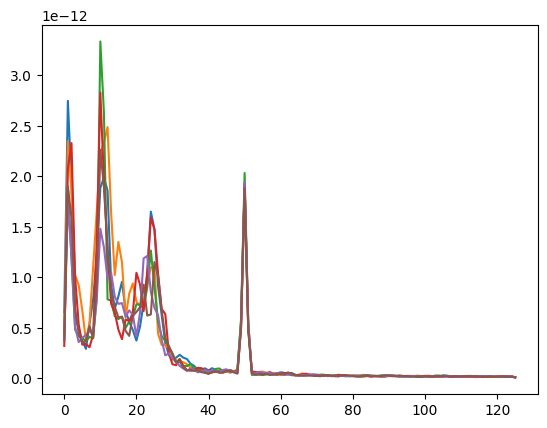

In [46]:
for i in cut_time_series.keys():
    
    fourier_transform = externalized_lfp_preprocessing.fourier_transform_to_psd(sfreq=250, lfp_data=cut_time_series[i])
    average_Zxx = fourier_transform["average_Zxx"]
    frequencies = fourier_transform["frequencies"]

    plt.plot(frequencies, average_Zxx) 

In [27]:
result_dict = {}

for i in range(1, 7): # list from 1 to 6
    start_index = (i - 1) * 5000 # 0, 5000, 10000, 15000, 20000, 25000
    end_index = i * 5000 # 5000, 10000, 15000, 20000, 25000, 30000
    result_dict[i] = single_time_series[start_index:end_index]

In [28]:
result_dict

{1: array([-0.0540201 , -0.05403082, -0.05403429, ..., -0.05409038,
        -0.05409101, -0.0540931 ]),
 2: array([-0.05409844, -0.0540978 , -0.05410218, ..., -0.05416765,
        -0.05416841, -0.05417036]),
 3: array([-0.05417465, -0.05417513, -0.05416992, ..., -0.0542386 ,
        -0.05424068, -0.05424908]),
 4: array([-0.05425554, -0.05425051, -0.0542498 , ..., -0.05432726,
        -0.05432369, -0.05432499]),
 5: array([-0.05433214, -0.0543315 , -0.05433117, ..., -0.05442764,
        -0.05442416, -0.05442586]),
 6: array([-0.05442371, -0.05442656, -0.05441703, ..., -0.05449054,
        -0.05448864, -0.05448722])}

In [18]:
array_six_chunks_a_20_sec = {i: single_time_series[(i-1)*5000:i*5000] for i in range(1, 7)}

## FOOOF BSSU externalized data

Use the function externalized_fooof_fit_2() for BSSU re-referenced data, but externalized_fooof_fit() for original externalized data

In [25]:
fooof_BSSU = externalized.externalized_fooof_fit_2(
    fooof_version="v2", 
    filtered="only_high_pass_filtered", 
    reference="bipolar_to_lowermost",
    monopolar_or_bipolar="bipolar"
)

In [4]:
load_fooof_externalized_BSSU = io_externalized.load_externalized_pickle(filename="fooof_externalized_group_BSSU_only_high_pass_filtered", fooof_version="v2", reference="bipolar_to_lowermost")

In [5]:
load_fooof_externalized_BSSU.head()

reference                 filtered   BIDS_id subject hemisphere  \
0  bipolar_to_lowermost  only_high_pass_filtered  noBIDS24     024      Right   
1  bipolar_to_lowermost  only_high_pass_filtered  noBIDS24     024      Right   
2  bipolar_to_lowermost  only_high_pass_filtered  noBIDS24     024      Right   
3  bipolar_to_lowermost  only_high_pass_filtered  noBIDS24     024      Right   
4  bipolar_to_lowermost  only_high_pass_filtered  noBIDS24     024      Right   

  subject_hemisphere contact  fooof_error  fooof_r_sq  fooof_exponent  \
0          024_Right      01     0.044412    0.985337        0.878644   
1          024_Right      02     0.045170    0.988558        1.007689   
2          024_Right      03     0.041704    0.989814        1.073204   
3          024_Right      12     0.031734    0.989257        1.138363   
4          024_Right      13     0.034274    0.991814        1.232080   

   fooof_offset                               fooof_power_spectrum  \
0    -11.684551  [2.040732860844656e-17, 7.750273632841699e-17,...   
1    -11.455216  [1.0901655419244326e-16, 3.4079791007611395e-1...   
2    -11.358843  [8.83336597749314e-17, 3.580688021938712e-16, ...   
3    -12.045663  [9.597905778303166e-19, 1.2905030522851244e-17...   
4    -11.691740  [4.327898567823852e-17, 2.7256412272653746e-16...   

                   periodic_plus_aperiodic_power_log  \
0  [-11.949041043304833, -12.103727797182374, -12...   
1  [-11.758533771099174, -11.935878490066047, -12...   
2  [-11.681890593223892, -11.870775324389502, -12...   
3  [-12.388343752619031, -12.588778731253617, -12...   
4  [-12.062610911079558, -12.27936578289023, -12....   

                                 fooof_periodic_flat  fooof_number_peaks  \
0  [7.88161929131356e-06, 4.274157436753946e-05, ...                   3   
1  [2.715339327179203e-05, 0.00012770960963908484...                   3   
2  [1.8442099028252365e-05, 0.0001155005010207149...                   3   
3  [1.019307115036269e-06, 2.1743675116171397e-05...                   3   
4  [2.171116618697524e-05, 0.0002252845564137572,...                   3   

                       alpha_peak_CF_power_bandWidth  \
0  [10.512693718358781, 0.9268564591887536, 3.000...   
1  [10.302985872840429, 0.9237196968742047, 3.152...   
2  [10.190249114144256, 0.8538622532126947, 3.267...   
3  [10.11727527032041, 0.6303030263474252, 3.1425...   
4  [10.233628895438338, 0.6121753832869832, 3.636...   

                    low_beta_peak_CF_power_bandWidth  \
0  [15.095997855378075, 0.5777804665493473, 5.554...   
1  [15.322645940406519, 0.5380195155490437, 6.002...   
2  [15.62421971675798, 0.4844188725871028, 6.0188...   
3  [14.534322669111285, 0.1970226233943002, 4.548...   
4  [15.990479629440804, 0.1969984319478506, 3.000...   

                   high_beta_peak_CF_power_bandWidth  \
0  [24.137006459923743, 0.9226094598130476, 7.462...   
1  [24.434558900880138, 0.8777634664765355, 7.250...   
2  [24.52576278150827, 0.8322729828730324, 6.9954...   
3  [24.047168152581865, 0.366453283587056, 6.9211...   
4  [23.792869348458275, 0.2862768114509091, 7.396...   

                        beta_peak_CF_power_bandWidth  \
0  [24.137006459923743, 0.9226094598130476, 7.462...   
1  [24.434558900880138, 0.8777634664765355, 7.250...   
2  [24.52576278150827, 0.8322729828730324, 6.9954...   
3  [24.047168152581865, 0.366453283587056, 6.9211...   
4  [23.792869348458275, 0.2862768114509091, 7.396...   

  gamma_peak_CF_power_bandWidth  
0               [nan, nan, nan]  
1               [nan, nan, nan]  
2               [nan, nan, nan]  
3               [nan, nan, nan]  
4               [nan, nan, nan]

## Monopolar referencing methods in BSSU simulated externalized LFP

NOT FOOOFed

In [6]:
bssu_data_loaded = io_externalized.load_externalized_pickle(filename="fourier_transform_externalized_BSSU_power_spectra_250Hz_artefact_free", reference="bipolar_to_lowermost")

In [8]:
bssu_data_loaded.head()

BIDS_id subject hemisphere  \
noBIDS24_Right_01_notch_and_band_pass_filtered  noBIDS24     024      Right   
noBIDS24_Right_01_unfiltered                    noBIDS24     024      Right   
noBIDS24_Right_01_only_high_pass_filtered       noBIDS24     024      Right   
noBIDS24_Right_02_notch_and_band_pass_filtered  noBIDS24     024      Right   
noBIDS24_Right_02_unfiltered                    noBIDS24     024      Right   

                                               subject_hemisphere channel  \
noBIDS24_Right_01_notch_and_band_pass_filtered          024_Right      01   
noBIDS24_Right_01_unfiltered                            024_Right      01   
noBIDS24_Right_01_only_high_pass_filtered               024_Right      01   
noBIDS24_Right_02_notch_and_band_pass_filtered          024_Right      02   
noBIDS24_Right_02_unfiltered                            024_Right      02   

                                                                    filtered  \
noBIDS24_Right_01_notch_and_band_pass_filtered  notch_and_band_pass_filtered   
noBIDS24_Right_01_unfiltered                                      unfiltered   
noBIDS24_Right_01_only_high_pass_filtered            only_high_pass_filtered   
noBIDS24_Right_02_notch_and_band_pass_filtered  notch_and_band_pass_filtered   
noBIDS24_Right_02_unfiltered                                      unfiltered   

                                                                                         lfp_data  \
noBIDS24_Right_01_notch_and_band_pass_filtered  [5.2580631866917335e-08, -8.07395841279414e-06...   
noBIDS24_Right_01_unfiltered                    [-0.05402010422003183, -0.05403081637623904, -...   
noBIDS24_Right_01_only_high_pass_filtered       [2.5097978689854487e-06, -7.857326029623908e-0...   
noBIDS24_Right_02_notch_and_band_pass_filtered  [4.051196847962224e-07, -5.867921586363009e-06...   
noBIDS24_Right_02_unfiltered                    [-0.056680708938918, -0.05668959381403876, -0....   

                                                                                      frequencies  \
noBIDS24_Right_01_notch_and_band_pass_filtered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_01_unfiltered                    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_01_only_high_pass_filtered       [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_02_notch_and_band_pass_filtered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_02_unfiltered                    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                                                                            times  \
noBIDS24_Right_01_notch_and_band_pass_filtered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_01_unfiltered                    [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_01_only_high_pass_filtered       [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_02_notch_and_band_pass_filtered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_02_unfiltered                    [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   

                                                                                            power  \
noBIDS24_Right_01_notch_and_band_pass_filtered  [[3.131767751245035e-14, 1.775412499369188e-14...   
noBIDS24_Right_01_unfiltered                    [[5.149240415519479e-14, 5.418575127170521e-14...   
noBIDS24_Right_01_only_high_pass_filtered       [[6.762083578680158e-12, 2.1891285717781016e-1...   
noBIDS24_Right_02_notch_and_band_pass_filtered  [[1.5893250219285548e-14, 1.6533244963961097e-...   
noBIDS24_Right_02_unfiltered                    [[8.206431223650169e-14, 2.1533476207176665e-1...   

                                                                          power_average_over_time  \
noBIDS24_Right_01_notch_and_band_pass_filtered  [4.243743386290976e-15, 1.9523421136845138e-15...   


In [17]:
new = io_externalized.load_externalized_pickle(filename="fourier_transform_externalized_power_spectra_250Hz_artefact_free", reference="bipolar_to_lowermost")

In [18]:
new.head()

BIDS_id subject hemisphere  \
noBIDS24_Right_0_notch_and_band_pass_filtered   noBIDS24     024      Right   
noBIDS24_Right_0_unfiltered                     noBIDS24     024      Right   
noBIDS24_Right_0_only_high_pass_filtered        noBIDS24     024      Right   
noBIDS24_Right_1A_notch_and_band_pass_filtered  noBIDS24     024      Right   
noBIDS24_Right_1A_unfiltered                    noBIDS24     024      Right   

                                               subject_hemisphere channel  \
noBIDS24_Right_0_notch_and_band_pass_filtered           024_Right       0   
noBIDS24_Right_0_unfiltered                             024_Right       0   
noBIDS24_Right_0_only_high_pass_filtered                024_Right       0   
noBIDS24_Right_1A_notch_and_band_pass_filtered          024_Right      1A   
noBIDS24_Right_1A_unfiltered                            024_Right      1A   

                                                                    filtered  \
noBIDS24_Right_0_notch_and_band_pass_filtered   notch_and_band_pass_filtered   
noBIDS24_Right_0_unfiltered                                       unfiltered   
noBIDS24_Right_0_only_high_pass_filtered             only_high_pass_filtered   
noBIDS24_Right_1A_notch_and_band_pass_filtered  notch_and_band_pass_filtered   
noBIDS24_Right_1A_unfiltered                                      unfiltered   

                                                                                         lfp_data  \
noBIDS24_Right_0_notch_and_band_pass_filtered   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
noBIDS24_Right_0_unfiltered                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
noBIDS24_Right_0_only_high_pass_filtered        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
noBIDS24_Right_1A_notch_and_band_pass_filtered  [1.9017961460546365e-07, 8.100042897097374e-06...   
noBIDS24_Right_1A_unfiltered                    [0.05433642520497486, 0.054347083627832055, 0....   

                                                                                      frequencies  \
noBIDS24_Right_0_notch_and_band_pass_filtered   [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_0_unfiltered                     [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_0_only_high_pass_filtered        [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_1A_notch_and_band_pass_filtered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_1A_unfiltered                    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                                                                            times  \
noBIDS24_Right_0_notch_and_band_pass_filtered   [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_0_unfiltered                     [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_0_only_high_pass_filtered        [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_1A_notch_and_band_pass_filtered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_1A_unfiltered                    [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   

                                                                                            power  \
noBIDS24_Right_0_notch_and_band_pass_filtered   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
noBIDS24_Right_0_unfiltered                     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
noBIDS24_Right_0_only_high_pass_filtered        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
noBIDS24_Right_1A_notch_and_band_pass_filtered  [[4.678660051476136e-14, 2.680758059971337e-14...   
noBIDS24_Right_1A_unfiltered                    [[1.0569218027891436e-14, 1.8992137722830658e-...   

                                                                          power_average_over_time  \
noBIDS24_Right_0_notch_and_band_pass_filtered   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   


### NOT FOOOF EUCLIDEAN

In [187]:
euclidean_externalized_bssu = MonoRefWeightedCoordinateDistance.externalized_bssu_weight_psd_by_euclidean_distance(
    fooof_version="v2",
    data_type="notch_and_band_pass_filtered",
    only_segmental= "yes",
    similarity_calculation="inverse_distance"   
)

/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/monopolar/monoRef_weightPsdAverageByCoordinateDistance.py:1437: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/monopolar/monoRef_weightPsdAverageByCoordinateDistance.py:1438: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/monopolar/monoRef_weightPsdAverageByCoordinateDistance.py:

notch_and_band_pass_filtered_externalized_BSSU_monoRef_only_segmental_weight_beta_psd_by_inverse_distance_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
notch_and_band_pass_filtered_externalized_BSSU_euclidean_weighted_power_spectra_only_segmental_inverse_distance_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [116]:
euclidean_externalized_bssu["monopolar_Dataframe"].head()

coord_z            coord_xy session subject_hemisphere  \
1A  2.0+0.0j  0.650000+0.000000j  postop          024_Right   
1B  2.0+0.0j -0.325000+0.562917j  postop          024_Right   
1C  2.0+0.0j -0.325000-0.562917j  postop          024_Right   
2A  4.0+0.0j  0.650000+0.000000j  postop          024_Right   
2B  4.0+0.0j -0.325000+0.562917j  postop          024_Right   

    estimated_monopolar_beta_psd contact  rank  beta_relative_to_max  \
1A                  9.672770e-13      1A   1.0              1.000000   
1B                  8.915193e-13      1B   2.0              0.921679   
1C                  8.353487e-13      1C   3.0              0.863609   
2A                  6.606240e-13      2A   4.0              0.682973   
2B                  6.036242e-13      2B   5.0              0.624045   

    beta_cluster  
1A             1  
1B             1  
1C             1  
2A             2  
2B             2

### FOOOF EUCLIDEAN

In [177]:
load_fooof_externalized_BSSU = io_externalized.load_externalized_pickle(filename="fooof_externalized_group_BSSU_only_high_pass_filtered", fooof_version="v2", reference="bipolar_to_lowermost")

In [181]:
len(load_fooof_externalized_BSSU.fooof_power_spectrum.values[1])

44

In [138]:
loaded_data = io_externalized.load_data_to_weight(data_type="only_high_pass_filtered")


In [139]:
loaded_data["loaded_data"].head()

BIDS_id subject hemisphere  \
noBIDS24_Right_01_only_high_pass_filtered  noBIDS24     024      Right   
noBIDS24_Right_02_only_high_pass_filtered  noBIDS24     024      Right   
noBIDS24_Right_03_only_high_pass_filtered  noBIDS24     024      Right   
noBIDS24_Right_12_only_high_pass_filtered  noBIDS24     024      Right   
noBIDS24_Right_13_only_high_pass_filtered  noBIDS24     024      Right   

                                          subject_hemisphere bipolar_channel  \
noBIDS24_Right_01_only_high_pass_filtered          024_Right              01   
noBIDS24_Right_02_only_high_pass_filtered          024_Right              02   
noBIDS24_Right_03_only_high_pass_filtered          024_Right              03   
noBIDS24_Right_12_only_high_pass_filtered          024_Right              12   
noBIDS24_Right_13_only_high_pass_filtered          024_Right              13   

                                                          filtered  \
noBIDS24_Right_01_only_high_pass_filtered  only_high_pass_filtered   
noBIDS24_Right_02_only_high_pass_filtered  only_high_pass_filtered   
noBIDS24_Right_03_only_high_pass_filtered  only_high_pass_filtered   
noBIDS24_Right_12_only_high_pass_filtered  only_high_pass_filtered   
noBIDS24_Right_13_only_high_pass_filtered  only_high_pass_filtered   

                                                                                    lfp_data  \
noBIDS24_Right_01_only_high_pass_filtered  [2.5097978689854487e-06, -7.857326029623908e-0...   
noBIDS24_Right_02_only_high_pass_filtered  [1.5092891581170489e-06, -7.141439125523177e-0...   
noBIDS24_Right_03_only_high_pass_filtered  [2.0044483669667603e-06, -7.321759874859456e-0...   
noBIDS24_Right_12_only_high_pass_filtered  [-1.0006768531720542e-06, 7.157169106543659e-0...   
noBIDS24_Right_13_only_high_pass_filtered  [-5.054836602006715e-07, 5.354331240126414e-07...   

                                                                                 frequencies  \
noBIDS24_Right_01_only_high_pass_filtered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_02_only_high_pass_filtered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_03_only_high_pass_filtered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_12_only_high_pass_filtered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   
noBIDS24_Right_13_only_high_pass_filtered  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...   

                                                                                       times  \
noBIDS24_Right_01_only_high_pass_filtered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_02_only_high_pass_filtered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_03_only_high_pass_filtered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_12_only_high_pass_filtered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   
noBIDS24_Right_13_only_high_pass_filtered  [0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...   

                                                                                       power  \
noBIDS24_Right_01_only_high_pass_filtered  [[6.762083578680158e-12, 2.1891285717781016e-1...   
noBIDS24_Right_02_only_high_pass_filtered  [[5.800889139723872e-12, 9.99718239568231e-14,...   
noBIDS24_Right_03_only_high_pass_filtered  [[5.046370363121735e-12, 2.6955048514956716e-1...   
noBIDS24_Right_12_only_high_pass_filtered  [[3.678193214161347e-14, 2.3007709954192002e-1...   
noBIDS24_Right_13_only_high_pass_filtered  [[1.2525892908213708e-13, 9.227660362198585e-1...   

                                                                     power_average_over_time  \
noBIDS24_Right_01_only_high_pass_filtered  [4.0519847318355753e-13, 2.051859569849184e-12...   
noBIDS24_Right_02_only_high_pass_filtered  [3.9442328635176656e-13, 2.0319789163124166e-1...   
noBIDS24_Right_03_only_high_pass_filtered  [4.655786185550316e-13, 2.4304052737907004e-12...   
noBID

In [188]:
euclidean_externalized_bssu = MonoRefWeightedCoordinateDistance.externalized_bssu_weight_psd_by_euclidean_distance(
    fooof_version="v2",
    data_type="fooof",
    only_segmental= "yes",
    similarity_calculation="inverse_distance"   
)

fooof_externalized_BSSU_monoRef_only_segmental_weight_beta_psd_by_inverse_distance_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
fooof_externalized_BSSU_euclidean_weighted_power_spectra_only_segmental_inverse_distance_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/monopolar/monoRef_weightPsdAverageByCoordinateDistance.py:1437: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/monopolar/monoRef_weightPsdAverageByCoordinateDistance.py:1438: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/jenniferbehnke/code/BetaSenSightLongterm/BetaSenSightLongterm/src/bssu/monopolar/monoRef_weightPsdAverageByCoordinateDistance.py:

In [176]:
euclidean_externalized_bssu["monopolar_Dataframe"].head()

coord_z            coord_xy session subject_hemisphere  \
1A  2.0+0.0j  0.650000+0.000000j  postop          024_Right   
1B  2.0+0.0j -0.325000+0.562917j  postop          024_Right   
1C  2.0+0.0j -0.325000-0.562917j  postop          024_Right   
2A  4.0+0.0j  0.650000+0.000000j  postop          024_Right   
2B  4.0+0.0j -0.325000+0.562917j  postop          024_Right   

    estimated_monopolar_beta_psd contact  rank  beta_relative_to_max  \
1A                  3.747422e-13      1A   1.0              1.000000   
1B                  3.497237e-13      1B   2.0              0.933238   
1C                  3.089530e-13      1C   3.0              0.824441   
2A                  1.749955e-13      2A   4.0              0.466976   
2B                  1.559181e-13      2B   5.0              0.416068   

    beta_cluster  
1A             1  
1B             1  
1C             1  
2A             2  
2B             2

PLOT WEIGHTED POWER SPECTRA

In [23]:
data = loadResults.load_pickle_group_result(filename="fooof_externalized_BSSU_euclidean_weighted_power_spectra_only_segmental_inverse_distance",
                                            fooof_version="v2",)

In [25]:
data["024_Left"]

{'1A': array([5.27712219e-14, 4.50603191e-14, 5.17288258e-14, 7.88908117e-14,
        1.45780935e-13, 2.91720181e-13, 5.90670727e-13, 1.16883892e-12,
        2.11012640e-12, 3.01816635e-12, 3.30230804e-12, 2.95853486e-12,
        2.27965844e-12, 1.62569666e-12, 1.18171559e-12, 9.64205356e-13,
        9.53943173e-13, 1.15601896e-12, 1.58766493e-12, 2.22504609e-12,
        2.91472018e-12, 3.34710296e-12, 3.24651235e-12, 2.64521664e-12,
        1.85328439e-12, 1.16152720e-12, 6.77514390e-13, 3.78319688e-13,
        2.04991543e-13, 1.07978137e-13, 5.50273753e-14, 2.69504256e-14,
        1.26222547e-14, 5.65190134e-15, 2.43965043e-15, 1.03826821e-15,
        4.54830524e-16, 2.17652453e-16, 1.18986928e-16, 7.38931588e-17,
        4.98541116e-17, 3.49519426e-17, 2.47849901e-17, 1.75518654e-17]),
 '1B': array([5.21372506e-14, 4.34467780e-14, 4.75490637e-14, 6.87695634e-14,
        1.24066663e-13, 2.52115378e-13, 5.32368729e-13, 1.10966752e-12,
        2.06972467e-12, 2.86987232e-12, 2.90897174

### NOT FOOOF BUSCH

In [152]:
JLB_externalized_bssu = MonoRefJLB.externalized_bssu_monoRef_JLB(fooof_version="v2", data_type="fooof")

MonoRef_JLB_fooof_externalized_BSSU_beta_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
MonoRef_JLB_fooof_externalized_BSSU_weighted_power_spectra_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [153]:
data = loadResults.load_pickle_group_result(filename="MonoRef_JLB_notch_and_band_pass_filtered_externalized_BSSU_beta_v2",
                                            fooof_version="v2",)

In [155]:
data.head()

session subject_hemisphere contact  \
024_Right_1A  postop          024_Right      1A   
024_Right_1B  postop          024_Right      1B   
024_Right_1C  postop          024_Right      1C   
024_Right_2A  postop          024_Right      2A   
024_Right_2B  postop          024_Right      2B   

                                  weighted_fooof_power_spectrum  \
024_Right_1A  [1.0576444352831599e-14, 4.916843241666281e-15...   
024_Right_1B  [2.7237678012065356e-15, 1.259707263047152e-15...   
024_Right_1C  [4.1337319578159525e-15, 1.8617613900386327e-1...   
024_Right_2A  [2.2951001013201265e-15, 1.0305734908353071e-1...   
024_Right_2B  [5.910606199944664e-16, 2.6403544870166267e-16...   

              estimated_monopolar_beta_psd  rank  beta_relative_to_max  \
024_Right_1A                  1.291282e-12   1.0              1.000000   
024_Right_1B                  2.819321e-13   3.0              0.218335   
024_Right_1C                  3.215759e-13   2.0              0.249036   
024_Right_2A                  1.402230e-13   4.0              0.108592   
024_Right_2B                  3.147118e-14   6.0              0.024372   

              beta_cluster  
024_Right_1A             1  
024_Right_1B             3  
024_Right_1C             3  
024_Right_2A             3  
024_Right_2B             3

### FOOOF Busch

In [3]:
JLB_externalized_bssu = MonoRefJLB.externalized_bssu_monoRef_JLB(fooof_version="v2", data_type="fooof")

MonoRef_JLB_fooof_externalized_BSSU_beta_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
MonoRef_JLB_fooof_externalized_BSSU_weighted_power_spectra_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [4]:
JLB_externalized_bssu_loaded = loadResults.load_pickle_group_result(filename="MonoRef_JLB_fooof_externalized_BSSU_beta", fooof_version="v2",)

In [7]:
JLB_externalized_bssu_loaded.head()

session subject_hemisphere contact  \
024_Right_1A  postop          024_Right      1A   
024_Right_1B  postop          024_Right      1B   
024_Right_1C  postop          024_Right      1C   
024_Right_2A  postop          024_Right      2A   
024_Right_2B  postop          024_Right      2B   

                                  weighted_fooof_power_spectrum  \
024_Right_1A  [3.212271328842444e-16, 9.776020750875878e-16,...   
024_Right_1B  [5.319066885565204e-18, 3.786590786463887e-17,...   
024_Right_1C  [5.034628075201354e-19, 6.925747276115192e-18,...   
024_Right_2A  [1.2752544406253587e-16, 7.818687970016595e-16...   
024_Right_2B  [2.111640945425574e-18, 3.028448136922001e-17,...   

              estimated_monopolar_beta_psd  rank  beta_relative_to_max  \
024_Right_1A                  9.919938e-13   1.0              1.000000   
024_Right_1B                  8.272650e-14   2.0              0.083394   
024_Right_1C                  5.853993e-14   3.0              0.059012   
024_Right_2A                  5.013370e-14   4.0              0.050538   
024_Right_2B                  3.810956e-15   5.0              0.003842   

              beta_cluster  
024_Right_1A             1  
024_Right_1B             3  
024_Right_1C             3  
024_Right_2A             3  
024_Right_2B             3

### NOT FOOOF Detec

In [165]:
fooof_detec_externalized = detec_strelow.detec_rank_level_and_direction_externalized_bssu(fooof_version="v2", data_type="notch_and_band_pass_filtered")

detec_strelow_notch_and_band_pass_filtered_externalized_BSSU_weighted_power_spectra_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
notch_and_band_pass_filtered_detec_externalized_bssu_beta_all_directional_ranks_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
notch_and_band_pass_filtered_detec_externalized_bssu_beta_levels_and_directions_ranks_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [171]:
fooof_detec_externalized[0].head()

subject_hemisphere session contact  \
0          024_Right  postop      1A   
1          024_Right  postop      1B   
2          024_Right  postop      1C   
3          024_Right  postop      2A   
4          024_Right  postop      2B   

                       weighted_fooof_power_spectrum  \
0  [7.66273997145851e-16, 3.4567297537463104e-16,...   
1  [5.914359508786205e-16, 2.6703827333248596e-16...   
2  [5.12330409631249e-16, 2.324679880773268e-16, ...   
3  [4.0311449143177725e-16, 1.7674924399672544e-1...   
4  [3.870978103007582e-16, 1.7290658760229638e-16...   

   estimated_monopolar_beta_psd  beta_rank  beta_relative_to_max  beta_cluster  
0                  1.074075e-13        1.0              1.000000             1  
1                  9.717065e-14        2.0              0.904692             1  
2                  6.908494e-14        3.0              0.643204             2  
3                  3.196334e-14        4.0              0.297590             3  
4                  2.983235e-14        5.0              0.277749             3

### FOOOF Detec

In [4]:
fooof_detec_externalized = detec_strelow.detec_rank_level_and_direction_externalized_bssu(fooof_version="v2", data_type="fooof")

detec_strelow_fooof_externalized_BSSU_weighted_power_spectra_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
fooof_detec_externalized_bssu_beta_all_directional_ranks_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results
fooof_detec_externalized_bssu_beta_levels_and_directions_ranks_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [164]:
fooof_detec_externalized[1].head()

subject_hemisphere session contact  \
0          024_Right  postop       1   
1          024_Right  postop       2   
2          024_Right  postop      1A   
3          024_Right  postop      1B   
4          024_Right  postop      1C   

                       weighted_fooof_power_spectrum  \
0  [2.6879132515872585e-18, 1.416811426340856e-17...   
1  [3.467537945847701e-18, 1.1475821597680686e-17...   
2  [2.0324494626649924e-17, 7.508582215315437e-17...   
3  [3.0699827256699266e-19, 1.4406518165873533e-1...   
4  [2.0624418719014295e-17, 7.645147898288007e-17...   

   estimated_monopolar_beta_psd  beta_rank level_or_direction  
0                  2.431719e-14        1.0              level  
1                  1.264429e-14        2.0              level  
2                  4.860062e-14        2.0          direction  
3                  4.864814e-14        1.0          direction  
4                  2.767511e-14        3.0          direction

### FOOOF best BSSU 

In [4]:
externalized_best_bssu = bssu_contacts.select_directional_contact_pair_from_externalized_bssu(
    fooof_version="v2",
)

best_2_contacts_from_directional_externalized_bssu_v2.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/results


In [7]:
externalized_best_bssu[1]

session subject_hemisphere selected_2_contacts
024_Right  postop          024_Right            [1A, 1B]
024_Left   postop           024_Left            [1A, 2A]
025_Right  postop          025_Right            [1A, 1C]
025_Left   postop           025_Left            [1A, 2A]
028_Right  postop          028_Right            [2A, 2C]
028_Left   postop           028_Left            [1A, 2A]
029_Right  postop          029_Right            [1B, 1C]
029_Left   postop           029_Left            [1A, 2A]
030_Right  postop          030_Right            [1B, 2B]
030_Left   postop           030_Left            [1B, 2B]
032_Right  postop          032_Right            [1A, 2A]
032_Left   postop           032_Left            [1C, 2C]
047_Right  postop          047_Right            [2B, 2C]
047_Left   postop           047_Left            [1C, 2C]
048_Right  postop          048_Right            [2A, 2C]
048_Left   postop           048_Left            [1A, 1B]
049_Right  postop          049_Right            [1B, 2B]
049_Left   postop           049_Left            [2A, 2C]
052_Right  postop          052_Right            [2B, 2C]
052_Left   postop           052_Left            [1C, 2C]
056_Right  postop          056_Right            [1A, 2A]
056_Left   postop           056_Left            [1B, 2B]
059_Right  postop          059_Right            [1A, 2A]
059_Left   postop           059_Left            [1A, 1C]
061_Right  postop          061_Right            [1A, 1C]
061_Left   postop           061_Left            [1A, 1B]
064_Right  postop          064_Right            [1A, 1B]
064_Left   postop           064_Left            [2A, 2C]
067_Right  postop          067_Right            [1A, 2A]
067_Left   postop           067_Left            [1B, 2B]
069_Right  postop          069_Right            [1B, 2B]
069_Left   postop           069_Left            [1B, 2B]
071_Right  postop          071_Right            [1A, 1C]
071_Left   postop           071_Left            [1C, 2C]
072_Right  postop          072_Right            [2B, 2C]
072_Left   postop           072_Left            [1B, 2B]
075_Right  postop          075_Right            [1A, 1C]
075_Left   postop           075_Left            [2A, 2B]
077_Right  postop          077_Right            [1B, 2B]
077_Left   postop           077_Left            [1A, 1C]
079_Right  postop          079_Right            [1C, 2C]
079_Left   postop           079_Left            [1B, 1C]
080_Right  postop          080_Right            [1B, 1C]
080_Left   postop           080_Left            [1B, 2B]

### PLOT WEIGHTED POWER SPECTRA

In [9]:
loaded_power_spectra = loadResults.load_pickle_group_result(
    filename="notch_and_band_pass_filtered_externalized_BSSU_euclidean_weighted_power_spectra_only_segmental_inverse_distance_v2", fooof_version="v2"
)

In [ ]:
methods = [ "euclidean_directional_externalized_bssu"
            "JLB_directional_externalized_bssu"
            "detec_strelow_contacts_externalized_bssu"
            "euclidean_directional_externalized_fooof"
            "JLB_directional_externalized_fooof"
            "detec_strelow_contacts_externalized_fooof"
            "externalized_bssu_monopolar"]

In [3]:
plot_power_spectra = power_spectra_externalized.plot_power_spectra_monopolar(
    method="detec_strelow_contacts_externalized_fooof",
    fooof="yes",
    only_directional="yes"
)